In [1]:
# ===================================
# 
# SETUP
#
# ===================================

In [2]:
# -----------------------------------
# PICKLES

import dill

# ---- SESSIONS ----
#dill.dump_session('./working.db')
#dill.load_session('./working.db')

# ---- OBJECTS ----
#dill.dump(df_results, open("df_results.pkl", "wb"))

In [3]:
# -----------------------------------
# LIBRARY IMPORTS
import sqlite3
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
# -----------------------------------
# RAW DATA IMPORT

'''# ---- CONVERT RAW SQLITE TABLES TO CSV FILES ----
db = sqlite3.connect('data/database.sqlite')
cursor = db.cursor()
cursor.execute('SELECT name FROM sqlite_master WHERE type="table";')
tables = cursor.fetchall()
for table_name in tables:
    table_name = table_name[0]
    table = pd.read_sql_query('SELECT * FROM %s' % table_name, db)
    table.to_csv(table_name + '.csv', index_label='index')
cursor.close()
db.close()
del table

table_names = pd.DataFrame(tables)
table_names.to_csv('data/table_names.csv')'''

'# ---- CONVERT RAW SQLITE TABLES TO CSV FILES ----\ndb = sqlite3.connect(\'data/database.sqlite\')\ncursor = db.cursor()\ncursor.execute(\'SELECT name FROM sqlite_master WHERE type="table";\')\ntables = cursor.fetchall()\nfor table_name in tables:\n    table_name = table_name[0]\n    table = pd.read_sql_query(\'SELECT * FROM %s\' % table_name, db)\n    table.to_csv(table_name + \'.csv\', index_label=\'index\')\ncursor.close()\ndb.close()\ndel table\n\ntable_names = pd.DataFrame(tables)\ntable_names.to_csv(\'data/table_names.csv\')'

In [5]:
# ---- IMPORT DATAFRAMES ----
table_names = pd.read_csv('data/table_names.csv', index_col=0)
names = [name[0] for name in table_names.values]

# Create dictionary
df = {}
for name in names:
    df[name] = pd.read_csv('data/'+name+'.csv', index_col=0)
    
# Unpack dictionary
raw_df_user = df['user']
raw_df_method = df['method']
raw_df_grade = df['grade']
raw_df_ascent = df['ascent']

# Delete unnecessary dataframes
del df
del raw_df_ascent.index.name
del raw_df_grade.index.name
del raw_df_method.index.name
del raw_df_user.index.name

C:\Users\steve\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\steve\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# -----------------------------------
# RAW DATA INSPECTION
raw_df_user.head()

,id,first_name,last_name,city,country,sex,height,weight,started,competitions,occupation,sponsor1,sponsor2,sponsor3,best_area,worst_area,guide_area,interests,birth,presentation,deactivated,anonymous
0,1,first,last,Göteborg,SWE,0,177,73,1996,NaN,NaN,NaN,NaN,NaN,"Railay beach, Krabi, Thailand",NaN,NaN,NaN,1976-03-10,NaN,0,0
1,2,first,last,stockholm,SWE,0,0,0,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,3,first,last,Umeå,SWE,0,180,78,1995,NaN,NaN,NaN,NaN,NaN,Hell,Umeå,NaN,NaN,1973-09-09,NaN,0,0
3,4,first,last,Goteborg,SWE,1,165,58,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1984-07-26,NaN,0,0
4,5,first,last,North Attleboro,USA,0,0,0,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1969-05-07,NaN,0,0


In [7]:
raw_df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62593 entries, 0 to 62592
Data columns (total 22 columns):
id              62593 non-null int64
first_name      62593 non-null object
last_name       62593 non-null object
city            61163 non-null object
country         62495 non-null object
sex             62593 non-null int64
height          62593 non-null int64
weight          62593 non-null int64
started         62593 non-null int64
competitions    4888 non-null object
occupation      11778 non-null object
sponsor1        5355 non-null object
sponsor2        2656 non-null object
sponsor3        1497 non-null object
best_area       15413 non-null object
worst_area      220 non-null object
guide_area      7755 non-null object
interests       8577 non-null object
birth           27856 non-null object
presentation    6113 non-null object
deactivated     62593 non-null int64
anonymous       62593 non-null int64
dtypes: int64(7), object(15)
memory usage: 11.0+ MB


In [8]:
raw_df_ascent.head()

,id,user_id,grade_id,notes,raw_notes,method_id,climb_type,total_score,date,year,last_year,rec_date,project_ascent_date,name,crag_id,crag,sector_id,sector,country,comment,rating,description,yellow_id,climb_try,repeat,exclude_from_ranking,user_recommended,chipped
0,2,1.0,36,NaN,0,3,0,545,918342000.0,1999.0,0.0,1.107126e+09,0.0,The King And I,16596.0,Railay,61.0,Dum's kitchen,THA,Thailand\r\n,0.0,NaN,255.0,0.0,0.0,0.0,0.0,0.0
1,3,1.0,36,NaN,0,3,0,545,925509600.0,1999.0,0.0,1.107126e+09,0.0,vet ej,0.0,Nya berg - segl.,0.0,NaN,NaN,\r\n,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,4,1.0,36,NaN,0,3,0,545,933026400.0,1999.0,0.0,1.107126e+09,0.0,Mr Big,209.0,Sjöända,371.0,Huvudväggen,SWE,\r\n,0.0,NaN,255.0,0.0,0.0,0.0,0.0,0.0
3,5,1.0,36,NaN,0,3,0,545,933026400.0,1999.0,0.0,1.107126e+09,0.0,Tak ska du ha,209.0,Sjöända,371.0,Huvudväggen,SWE,\r\n,0.0,NaN,255.0,0.0,0.0,0.0,0.0,0.0
4,6,1.0,36,NaN,0,3,0,545,933458400.0,1999.0,0.0,1.107126e+09,0.0,Korpen flyger,0.0,"Rankulla, Vetlanda",0.0,NaN,NaN,\r\n,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
raw_df_ascent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4111878 entries, 0 to 4111876
Data columns (total 28 columns):
id                      int64
user_id                 float64
grade_id                int64
notes                   object
raw_notes               int64
method_id               int64
climb_type              int64
total_score             int64
date                    float64
year                    float64
last_year               float64
rec_date                float64
project_ascent_date     float64
name                    object
crag_id                 float64
crag                    object
sector_id               float64
sector                  object
country                 object
comment                 object
rating                  float64
description             object
yellow_id               float64
climb_try               float64
repeat                  float64
exclude_from_ranking    float64
user_recommended        float64
chipped                 float64
dtypes: float64

In [10]:
raw_df_method.head()

,id,score,shorthand,name
0,1,0,redpoint,Redpoint
1,2,53,flash,Flash
2,3,145,onsight,Onsight
3,4,-52,toprope,Toprope
4,5,95,onsight,Onsight


In [11]:
raw_df_method.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 4 columns):
id           5 non-null int64
score        5 non-null int64
shorthand    5 non-null object
name         5 non-null object
dtypes: int64(2), object(2)
memory usage: 200.0+ bytes


In [12]:
raw_df_grade.head()

,id,score,fra_routes,fra_routes_input,fra_routes_selector,fra_boulders,fra_boulders_input,fra_boulders_selector,usa_routes,usa_routes_input,usa_routes_selector,usa_boulders,usa_boulders_input,usa_boulders_selector
0,1,0,-,1,1,-,1,1,3/4,1,1,VB,1,1
1,2,0,1,0,0,1,0,0,NaN,0,0,NaN,0,0
2,3,0,1a,0,0,1A,0,0,NaN,0,0,NaN,0,0
3,4,0,1b,0,0,1B,0,0,NaN,0,0,NaN,0,0
4,5,0,1c,0,0,1C,0,0,NaN,0,0,NaN,0,0


In [13]:
raw_df_grade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 0 to 82
Data columns (total 14 columns):
id                       83 non-null int64
score                    83 non-null int64
fra_routes               83 non-null object
fra_routes_input         83 non-null int64
fra_routes_selector      83 non-null int64
fra_boulders             83 non-null object
fra_boulders_input       83 non-null int64
fra_boulders_selector    83 non-null int64
usa_routes               47 non-null object
usa_routes_input         83 non-null int64
usa_routes_selector      83 non-null int64
usa_boulders             45 non-null object
usa_boulders_input       83 non-null int64
usa_boulders_selector    83 non-null int64
dtypes: int64(10), object(4)
memory usage: 9.7+ KB


As seen above, there is a fair amount of data to wrangle: 62593 user ID entries with 22 columns each, 4111878 ascent entries with 28 columns each, five method entires (although one of them seems to be a duplicate) with four columns each, and 83 grade entires with 14 columns each.

There is a fair amount of NULL data to consider.

In [14]:
# ===================================
# 
# DATA CLEANING
#
# ===================================
df_user = raw_df_user.copy()
df_ascent = raw_df_ascent.copy()

In [15]:
# -----------------------------------
# USER DATAFRAME

# Drop unnecessary columns
df_user = df_user.drop(columns=['first_name', 'last_name', 'city', 'country', 
        'competitions', 'occupation', 'sponsor1', 'sponsor2', 
        'sponsor3', 'best_area', 'worst_area', 'guide_area',
        'interests', 'presentation', 'deactivated', 'anonymous'])

In [16]:
# ---- NULL/EMPTY VALUES
# Check for duplicate user IDs
if df_user['id'].duplicated().sum() == 0:
    print('No duplicate user IDs')
else:
    print('*** Duplicate user IDs found ***')

No duplicate user IDs


In [17]:
# NULL and empty value check
if df_user.isnull().sum().sum() == 0:
    print('No NULL values')
else:
    print('*** NULL values found ***')
    print('----------------')
    print(df_user.isnull().sum())
    print('----------------')
    
if df_user[df_user==''].sum().sum() == 0:
    print('\n')
    print('No empty string values')
else:
    print('\n')
    print('*** Empty strings found ***')
    print('----------------')
    print(df_user[df_user==''].sum())
    print('----------------')

*** NULL values found ***
----------------
id             0
sex            0
height         0
weight         0
started        0
birth      34737
dtype: int64
----------------


No empty string values


Text(0.5,1,'Null value heatmap (yellow is NULL)')

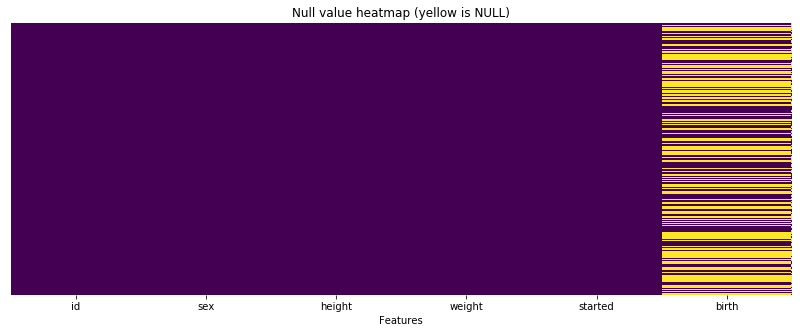

In [18]:
# Null value heatmap
plt.figure(figsize=(14,5))
sns.heatmap(df_user.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.xlabel('Features')
plt.title('Null value heatmap (yellow is NULL)')

In [19]:
# NULL value percentage
df_user['birth'].isnull().sum()/len(df_user['birth'])

0.5549662102791046

More than half of the users do not have 'birth' values logged. Instead of imputing these values we will use a reduced dataset when considering age as a variable.

In [20]:
# ---- DATA TYPES ----

In [21]:
df_user.head()

,id,sex,height,weight,started,birth
0,1,0,177,73,1996,1976-03-10
1,2,0,0,0,2000,NaN
2,3,0,180,78,1995,1973-09-09
3,4,1,165,58,2001,1984-07-26
4,5,0,0,0,1991,1969-05-07


In [22]:
# Check dataframe
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62593 entries, 0 to 62592
Data columns (total 6 columns):
id         62593 non-null int64
sex        62593 non-null int64
height     62593 non-null int64
weight     62593 non-null int64
started    62593 non-null int64
birth      27856 non-null object
dtypes: int64(5), object(1)
memory usage: 3.3+ MB


In [23]:
df_user['sex'].unique()

array([  0,   1, 255], dtype=int64)

In [24]:
df_user['sex'].value_counts()

0      53898
1       8691
255        4
Name: sex, dtype: int64

In [25]:
# Drop sex=255
df_user = df_user.drop(index=list(df_user[df_user['sex']==255].index))

In [26]:
# Sex dummy variables

In [27]:
df_user.groupby(by='sex').mean()

,id,height,weight,started
sex,,,,
0,32624.790122,85.152065,34.961297,1070.977940
1,36105.076056,76.043263,21.729951,1075.661834


There are significantly less sex=1 users and sex=1 users are on average shorter and lighter. It is thus assumed that sex=1 refers to females. As such, let's rename 'sex' to 'is_female'.

In [28]:
df_user.rename(columns={'sex':'is_female'}, inplace=True)

In [29]:
# ---- FILTER ----
# Filter to realistic heights
print(sorted(df_user['height'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 14, 15, 17, 18, 20, 22, 23, 25, 27, 30, 35, 45, 46, 48, 49, 52, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 83, 84, 85, 86, 88, 89, 90, 91, 94, 95, 96, 99, 100, 101, 102, 105, 110, 111, 112, 113, 114, 115, 118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 222, 225, 228, 230, 233, 234, 247, 250, 251, 254, 255]


These values are presumably centimeters. Let's filter to users having logged height between 120 and 240 cm (~4-8 feet)

In [30]:
# ---- DATES ----
# Manage dates; extract years and convert to floats (to deal with NaNs)
print(sorted(df_user['started'].unique()))

[0, 1901, 1902, 1906, 1907, 1909, 1912, 1914, 1915, 1917, 1919, 1920, 1922, 1925, 1928, 1929, 1938, 1942, 1943, 1945, 1950, 1952, 1956, 1957, 1958, 1960, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2019, 2020, 2021, 2025, 2050, 2090]


In [31]:
df_user['started'] = pd.to_datetime(df_user['started'], errors='coerce', format='%Y')

In [32]:
df_user['started'] = [date.year for date in df_user['started']]

In [33]:
df_user['birth_year'] = pd.to_datetime(df_user['birth'], errors='coerce')

In [34]:
df_user = df_user.drop(columns='birth')

In [35]:
df_user['birth_year'] = [date.year for date in df_user['birth_year']]

In [36]:
df_user.head()

,id,is_female,height,weight,started,birth_year
0,1,0,177,73,1996.0,1976.0
1,2,0,0,0,2000.0,NaN
2,3,0,180,78,1995.0,1973.0
3,4,1,165,58,2001.0,1984.0
4,5,0,0,0,1991.0,1969.0


In [37]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62589 entries, 0 to 62592
Data columns (total 6 columns):
id            62589 non-null int64
is_female     62589 non-null int64
height        62589 non-null int64
weight        62589 non-null int64
started       33470 non-null float64
birth_year    27854 non-null float64
dtypes: float64(2), int64(4)
memory usage: 3.3 MB


In [38]:
# Checkpoint
checkpoint_df_user_1 = df_user.copy()

In [39]:
# -----------------------------------
# ASCENT DATAFRAME

# ---- DROP COLUMNS ----
df_ascent = df_ascent.drop(columns=['notes', 'raw_notes',
        'total_score', 'date', 'last_year', 'rec_date', 'project_ascent_date', 
        'name', 'crag_id', 'crag', 'sector_id', 'sector', 'country', 'comment', 
        'rating', 'description', 'yellow_id', 'climb_try', 'repeat', 
        'exclude_from_ranking', 'user_recommended', 'chipped'])

In [40]:
df_ascent.columns

Index(['id', 'user_id', 'grade_id', 'method_id', 'climb_type', 'year'], dtype='object')

In [41]:
# ---- DUPLICATES ----
if df_ascent['id'].duplicated().sum() == 0:
    print('No duplicate ascent IDs')
else:
    print('*** Duplicate ascent IDs found ***')

*** Duplicate ascent IDs found ***


In [42]:
df_ascent[df_ascent['id'].duplicated()]

,id,user_id,grade_id,method_id,climb_type,year
ux. 3rd go,3,NaN,255,0,0,NaN


In [43]:
# ---- NULL/EMPTY ----
if df_ascent.isnull().sum().sum() == 0:
    print('No NULL values')
else:
    print('*** NULL values found ***')
    print('----------------')
    print(df_ascent.isnull().sum())
    print('----------------')
    
if df_ascent[df_ascent==''].sum().sum() == 0:
    print('\n')
    print('No empty string values')
else:
    print('\n')
    print('*** Empty strings found ***')
    print('----------------')
    print(df_ascent[df_ascent==''].sum())
    print('----------------')

*** NULL values found ***
----------------
id            0
user_id       1
grade_id      0
method_id     0
climb_type    0
year          1
dtype: int64
----------------


No empty string values


In [44]:
df_ascent = df_ascent.dropna()

In [45]:
# NULL and empty value check
if df_ascent.isnull().sum().sum() == 0:
    print('No NULL values')
else:
    print('*** NULL values found ***')
    print('----------------')
    print(df_ascent.isnull().sum())
    print('----------------')
    
if df_ascent[df_ascent==''].sum().sum() == 0:
    print('\n')
    print('No empty string values')
else:
    print('\n')
    print('*** Empty strings found ***')
    print('----------------')
    print(df_ascent[df_ascent==''].sum())
    print('----------------')

No NULL values


No empty string values


In [46]:
# Check for duplicate ascent IDs
if df_ascent['id'].duplicated().sum() == 0:
    print('No duplicate ascent IDs')
else:
    print('*** Duplicate ascent IDs found ***')

No duplicate ascent IDs


In [47]:
# ---- DATA TYPES ----
df_ascent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4111877 entries, 0 to 4111876
Data columns (total 6 columns):
id            int64
user_id       float64
grade_id      int64
method_id     int64
climb_type    int64
year          float64
dtypes: float64(2), int64(4)
memory usage: 219.6+ MB


In [48]:
# Convert user id to integer
df_ascent['user_id'] = [int(value) for value in df_ascent['user_id']]

In [49]:
# Look at year
print(sorted(df_ascent['year'].unique()))

[0.0, 7.0, 11.0, 13.0, 16.0, 199.0, 200.0, 201.0, 203.0, 205.0, 207.0, 208.0, 209.0, 1009.0, 1095.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0]


There are many bogus years included but we'll leave them for now.

In [50]:
# Checkpoint
checkpoint_df_ascent_1 = df_ascent.copy()

In [51]:
# -----------------------------------
# GRADE DATAFRAME
raw_df_grade.head()

,id,score,fra_routes,fra_routes_input,fra_routes_selector,fra_boulders,fra_boulders_input,fra_boulders_selector,usa_routes,usa_routes_input,usa_routes_selector,usa_boulders,usa_boulders_input,usa_boulders_selector
0,1,0,-,1,1,-,1,1,3/4,1,1,VB,1,1
1,2,0,1,0,0,1,0,0,NaN,0,0,NaN,0,0
2,3,0,1a,0,0,1A,0,0,NaN,0,0,NaN,0,0
3,4,0,1b,0,0,1B,0,0,NaN,0,0,NaN,0,0
4,5,0,1c,0,0,1C,0,0,NaN,0,0,NaN,0,0


In [52]:
raw_df_grade['id'].nunique()

83

In [53]:
print(sorted(raw_df_grade['id'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86]


In [54]:
print(sorted(raw_df_grade['fra_routes'].unique()))

['-', '1', '1+', '1a', '1b', '1c', '2', '2+', '2a', '2b', '2c', '3', '3+', '3a', '3a+', '3b', '3b+', '3c', '3c+', '4', '4+', '4a', '4a+', '4b', '4b+', '4c', '4c+', '5', '5a', '5a+', '5b', '5b+', '5c', '5c+', '6', '6a', '6a+', '6a+/6b', '6a/+', '6b', '6b+', '6b+/6c', '6b/+', '6c', '6c+', '6c+/7a', '6c/+', '7a', '7a+', '7a+/7b', '7a/+', '7b', '7b+', '7b+/7c', '7b/+', '7c', '7c+', '7c+/8a', '7c/+', '8a', '8a+', '8a+/8b', '8a/+', '8b', '8b+', '8b+/8c', '8b/+', '8c', '8c+', '8c+/9a', '8c/+', '9a', '9a+', '9a+/9b', '9a/+', '9b', '9b+', '9b+/9c', '9b/+', '9c', '9c+', '9c+/10a', '9c/+']


In [55]:
# -----------------------------------
# METHOD DATAFRAME
raw_df_method

,id,score,shorthand,name
0,1,0,redpoint,Redpoint
1,2,53,flash,Flash
2,3,145,onsight,Onsight
3,4,-52,toprope,Toprope
4,5,95,onsight,Onsight


I don't know what the score column is, but regardless this identifies the different climb types. For this analysis, I will not consider top ropes since I don't think that's a true measure of a person's climbing ability.

In [56]:
# ===================================
#
# MERGE DATA
#
# ===================================

# -----------------------------------
# MERGE USERS WITH ASCENTS
df = df_ascent.merge(df_user, left_on='user_id', right_on='id', suffixes=('_ascent','_user'))

In [57]:
df.head()

,id_ascent,user_id,grade_id,method_id,climb_type,year,id_user,is_female,height,weight,started,birth_year
0,2,1,36,3,0,1999.0,1,0,177,73,1996.0,1976.0
1,3,1,36,3,0,1999.0,1,0,177,73,1996.0,1976.0
2,4,1,36,3,0,1999.0,1,0,177,73,1996.0,1976.0
3,5,1,36,3,0,1999.0,1,0,177,73,1996.0,1976.0
4,6,1,36,3,0,1999.0,1,0,177,73,1996.0,1976.0


In [58]:
df = df[['user_id', 'is_female', 'height', 'weight', 'birth_year', 'started', 
    'id_ascent', 'method_id', 'grade_id', 'climb_type', 'year']]

In [59]:
# ---- ADD NEW COLUMNS ----

In [60]:
df['age'] = df['year'] - df['birth_year']

In [61]:
df['years_climbing'] = df['year'] - df['started']

In [62]:
df = df.drop(columns=['year','birth_year','started'])

In [63]:
df.head(2)

,user_id,is_female,height,weight,id_ascent,method_id,grade_id,climb_type,age,years_climbing
0,1,0,177,73,2,3,36,0,23.0,3.0
1,1,0,177,73,3,3,36,0,23.0,3.0


Note that inspection of several specific climbs with their online descriptions revealed that 'climb_type' refers to whether it is a bouldering climb ('climb_type'=1) or whether it is a rope climb ('climb_type'=0). Let's rename that to 'is_bouldering'.

In [64]:
# Rename columns
df.rename(columns={'user_id':'id_user',
                   'method_id':'id_method',
                   'grade_id':'id_grade',
                   'climb_type':'is_bouldering'}, inplace=True)

In [65]:
df.head()

,id_user,is_female,height,weight,id_ascent,id_method,id_grade,is_bouldering,age,years_climbing
0,1,0,177,73,2,3,36,0,23.0,3.0
1,1,0,177,73,3,3,36,0,23.0,3.0
2,1,0,177,73,4,3,36,0,23.0,3.0
3,1,0,177,73,5,3,36,0,23.0,3.0
4,1,0,177,73,6,3,36,0,23.0,3.0


In [66]:
# Checkpoint
checkpoint_df_1 = df.copy()

In [67]:
# ===================================
#
# FINALIZE/FILTER DATA
#
# ===================================

In [68]:
raw_df_method

,id,score,shorthand,name
0,1,0,redpoint,Redpoint
1,2,53,flash,Flash
2,3,145,onsight,Onsight
3,4,-52,toprope,Toprope
4,5,95,onsight,Onsight


In [69]:
df.head()

,id_user,is_female,height,weight,id_ascent,id_method,id_grade,is_bouldering,age,years_climbing
0,1,0,177,73,2,3,36,0,23.0,3.0
1,1,0,177,73,3,3,36,0,23.0,3.0
2,1,0,177,73,4,3,36,0,23.0,3.0
3,1,0,177,73,5,3,36,0,23.0,3.0
4,1,0,177,73,6,3,36,0,23.0,3.0


In [70]:
df['id_method'].unique()

array([3, 1, 4, 5, 2], dtype=int64)

In [71]:
df[df['id_method'] != 4]['id_method'].unique()

array([3, 1, 5, 2], dtype=int64)

In [72]:
df = df[df['id_method'] != 4]

In [73]:
df['id_method'].unique()

array([3, 1, 5, 2], dtype=int64)

In [74]:
df = df.drop(columns=['id_method'])

In [75]:
df.shape

(4046161, 9)

In [76]:
print(sorted(df['height'].unique()))

[0, 1, 2, 3, 4, 5, 6, 8, 10, 15, 18, 20, 22, 25, 27, 30, 35, 45, 52, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 80, 83, 84, 85, 86, 89, 90, 96, 100, 101, 105, 110, 111, 112, 113, 114, 115, 118, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 212, 215, 216, 220, 222, 228, 247, 250, 251, 254, 255]


In [77]:
print(sorted(df['weight'].unique()))

[0, 40, 43, 48, 53, 58, 63, 68, 73, 78, 83, 88, 93, 98, 100]


In [78]:
print(sorted(df['age'].unique()))

[-1989.0, -1982.0, -1977.0, -1970.0, -1966.0, -1961.0, -1802.0, -1795.0, -1792.0, -1786.0, -1785.0, -1784.0, -1783.0, -1781.0, -1780.0, -1779.0, -1778.0, -1777.0, -1775.0, -1774.0, -1772.0, -1769.0, -1768.0, -1764.0, -959.0, -875.0, -19.0, -18.0, -17.0, -16.0, -15.0, -14.0, -4.0, 3.0, 4.0, 5.0, 6.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, nan, -1986.0, -1983.0, -1981.0, -1980.0, -1978.0, -1973.0, -1971.0, -12.0, -11.0, -10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0

In [79]:
print(sorted(df['years_climbing'].unique()))

[-2004.0, -2001.0, -2000.0, -1999.0, -1997.0, -1996.0, -1994.0, -1992.0, -1989.0, -1988.0, -1985.0, -1809.0, -1808.0, -1807.0, -1806.0, -1804.0, -1801.0, -1800.0, -1799.0, -1798.0, -1797.0, -1796.0, -1794.0, -1793.0, -1792.0, -1791.0, -1789.0, -1784.0, -995.0, -896.0, -83.0, -82.0, -42.0, -41.0, -40.0, -39.0, -38.0, -37.0, -36.0, -35.0, -34.0, -33.0, -19.0, -17.0, -16.0, -15.0, -14.0, -13.0, -12.0, -11.0, -10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, nan, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 55.0, 56.0, 57.0, 59.0, 60.0, 61.0, 62.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 75.0, 76.0, 77.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 9

In [80]:
df.isnull().sum()

id_user                0
is_female              0
height                 0
weight                 0
id_ascent              0
id_grade               0
is_bouldering          0
age               882683
years_climbing    697857
dtype: int64

In [81]:
(df['age'].isnull().sum())/len(df)

0.2181532074477511

To really gage performance, it's important to not consider every single climb a given user does. Instead, let's extract the most difficult (ie highest 'id_grade') per user. Create different tables for bouldering vs rope climbing and for gender as well.

In [82]:
# Find max bouldering and rope climbing grades per user
df_max_grades = df[['id_user','id_grade','is_bouldering']].groupby(by=['id_user','is_bouldering'], as_index=False).max()

In [83]:
df_max_grades.head()

,id_user,is_bouldering,id_grade
0,1,0,62
1,1,1,51
2,2,0,49
3,2,1,46
4,3,0,62


In [84]:
# Filter df to only max grades
df_all = df_max_grades.merge(df, on=['id_user','id_grade','is_bouldering'])

In [85]:
df_all.head()

,id_user,is_bouldering,id_grade,is_female,height,weight,id_ascent,age,years_climbing
0,1,0,62,0,177,73,11324,25.0,5.0
1,1,1,51,0,177,73,56997,26.0,6.0
2,1,1,51,0,177,73,294319,29.0,9.0
3,1,1,51,0,177,73,294320,29.0,9.0
4,1,1,51,0,177,73,301240,29.0,9.0


In [86]:
# Reduce df to only include first personal best per user
df_all = df_all.sort_values(by=['id_user','is_bouldering','age']).\
        drop_duplicates(subset=['id_user','is_bouldering'], keep='first')

In [87]:
df_all.head()

,id_user,is_bouldering,id_grade,is_female,height,weight,id_ascent,age,years_climbing
0,1,0,62,0,177,73,11324,25.0,5.0
1,1,1,51,0,177,73,56997,26.0,6.0
5,2,0,49,0,0,0,126,NaN,1.0
6,2,1,46,0,0,0,318,NaN,1.0
7,3,0,62,0,180,78,915,26.0,4.0


In [88]:
df_all = df_all.drop(columns=['id_ascent'])

In [89]:
df_all.columns

Index(['id_user', 'is_bouldering', 'id_grade', 'is_female', 'height', 'weight',
       'age', 'years_climbing'],
      dtype='object')

In [90]:
df_all = df_all[['id_user','is_female','height','weight',
                'is_bouldering','id_grade','age','years_climbing']]

In [91]:
df_all.shape

(49598, 8)

In [92]:
df_all.head()

,id_user,is_female,height,weight,is_bouldering,id_grade,age,years_climbing
0,1,0,177,73,0,62,25.0,5.0
1,1,0,177,73,1,51,26.0,6.0
5,2,0,0,0,0,49,NaN,1.0
6,2,0,0,0,1,46,NaN,1.0
7,3,0,180,78,0,62,26.0,4.0


In [93]:
# -----------------------------------
# CREATE GENDER AND CLIMBING TYPE SUBSETS
df_bouldering_female = df_all[(df_all['is_bouldering']==1) & (df_all['is_female']==1)]
df_bouldering_male =   df_all[(df_all['is_bouldering']==1) & (df_all['is_female']==0)]
df_rope_female =       df_all[(df_all['is_bouldering']==0) & (df_all['is_female']==1)]
df_rope_male =         df_all[(df_all['is_bouldering']==0) & (df_all['is_female']==0)]

In [94]:
# Re-order columns
df_all.columns

Index(['id_user', 'is_female', 'height', 'weight', 'is_bouldering', 'id_grade',
       'age', 'years_climbing'],
      dtype='object')

In [95]:
df_bouldering_female.columns

Index(['id_user', 'is_female', 'height', 'weight', 'is_bouldering', 'id_grade',
       'age', 'years_climbing'],
      dtype='object')

In [96]:
# Drop unnecessary columns
df_bouldering_female = df_bouldering_female.drop(columns=['is_female','is_bouldering'])
df_bouldering_male = df_bouldering_male.drop(columns=['is_female','is_bouldering'])
df_rope_female = df_rope_female.drop(columns=['is_female','is_bouldering'])
df_rope_male = df_rope_male.drop(columns=['is_female','is_bouldering'])

In [97]:
df_bouldering_female.head()

,id_user,height,weight,id_grade,age,years_climbing
10,4,165,58,42,22.0,5.0
86,36,0,0,36,NaN,1.0
337,149,174,0,66,30.0,2.0
539,249,160,0,51,34.0,7.0
834,385,0,0,49,23.0,4.0


In [98]:
# Re-set all indexes
df_all = df_all.reset_index(drop=True)
df_bouldering_female = df_bouldering_female.reset_index(drop=True)
df_bouldering_male = df_bouldering_male.reset_index(drop=True)
df_rope_female = df_rope_female.reset_index(drop=True)
df_rope_male = df_rope_male.reset_index(drop=True)

In [99]:
df_all.shape

(49598, 8)

In [100]:
df_bouldering_female.shape

(2396, 6)

In [101]:
df_bouldering_male.shape

(16817, 6)

In [102]:
df_rope_female.shape

(4592, 6)

In [103]:
df_rope_male.shape

(25793, 6)

In [104]:
# Checkpoint
checkpoint_df_all_1 = df_all.copy()
checkpoint_df_bouldering_female_1 = df_bouldering_female.copy()
checkpoint_df_bouldering_male_1 = df_bouldering_male.copy()
checkpoint_df_rope_female_1 = df_rope_female.copy()
checkpoint_df_rope_male_1 = df_rope_male.copy()

In [105]:
dill.dump(df_all, open("df_all.pkl", "wb"))

In [106]:
raw_df_grade[raw_df_grade['id']==53]

,id,score,fra_routes,fra_routes_input,fra_routes_selector,fra_boulders,fra_boulders_input,fra_boulders_selector,usa_routes,usa_routes_input,usa_routes_selector,usa_boulders,usa_boulders_input,usa_boulders_selector
51,53,800,7b,1,1,7B,1,1,5.12b,1,0,V8,1,1


In [107]:
# ===================================
#
# EDA
#
# ===================================
df_all.head()

,id_user,is_female,height,weight,is_bouldering,id_grade,age,years_climbing
0,1,0,177,73,0,62,25.0,5.0
1,1,0,177,73,1,51,26.0,6.0
2,2,0,0,0,0,49,NaN,1.0
3,2,0,0,0,1,46,NaN,1.0
4,3,0,180,78,0,62,26.0,4.0


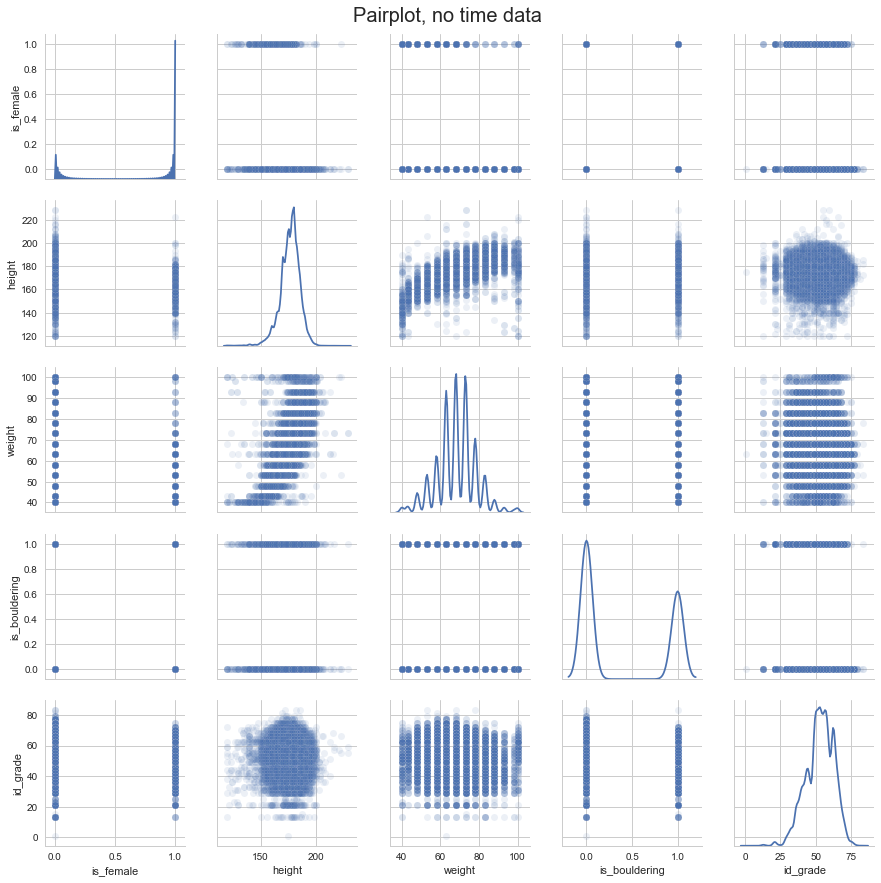

In [108]:
# -----------------------------------
# PAIRPLOTS

# ---- PAIRPLOT, NO TIME DATE ----
sns.set(style="whitegrid")
g = sns.pairplot(df_all[
    (df_all['height'] >= 120) & (df_all['height'] <= 240) &
    (df_all['weight'] != 0)]\
                 .drop(columns=['id_user','age','years_climbing']), 
                 diag_kind='kde', dropna=True, plot_kws={'alpha':'0.1'})
g.fig.suptitle("Pairplot, no time data", size=20)
plt.subplots_adjust(top=0.95)

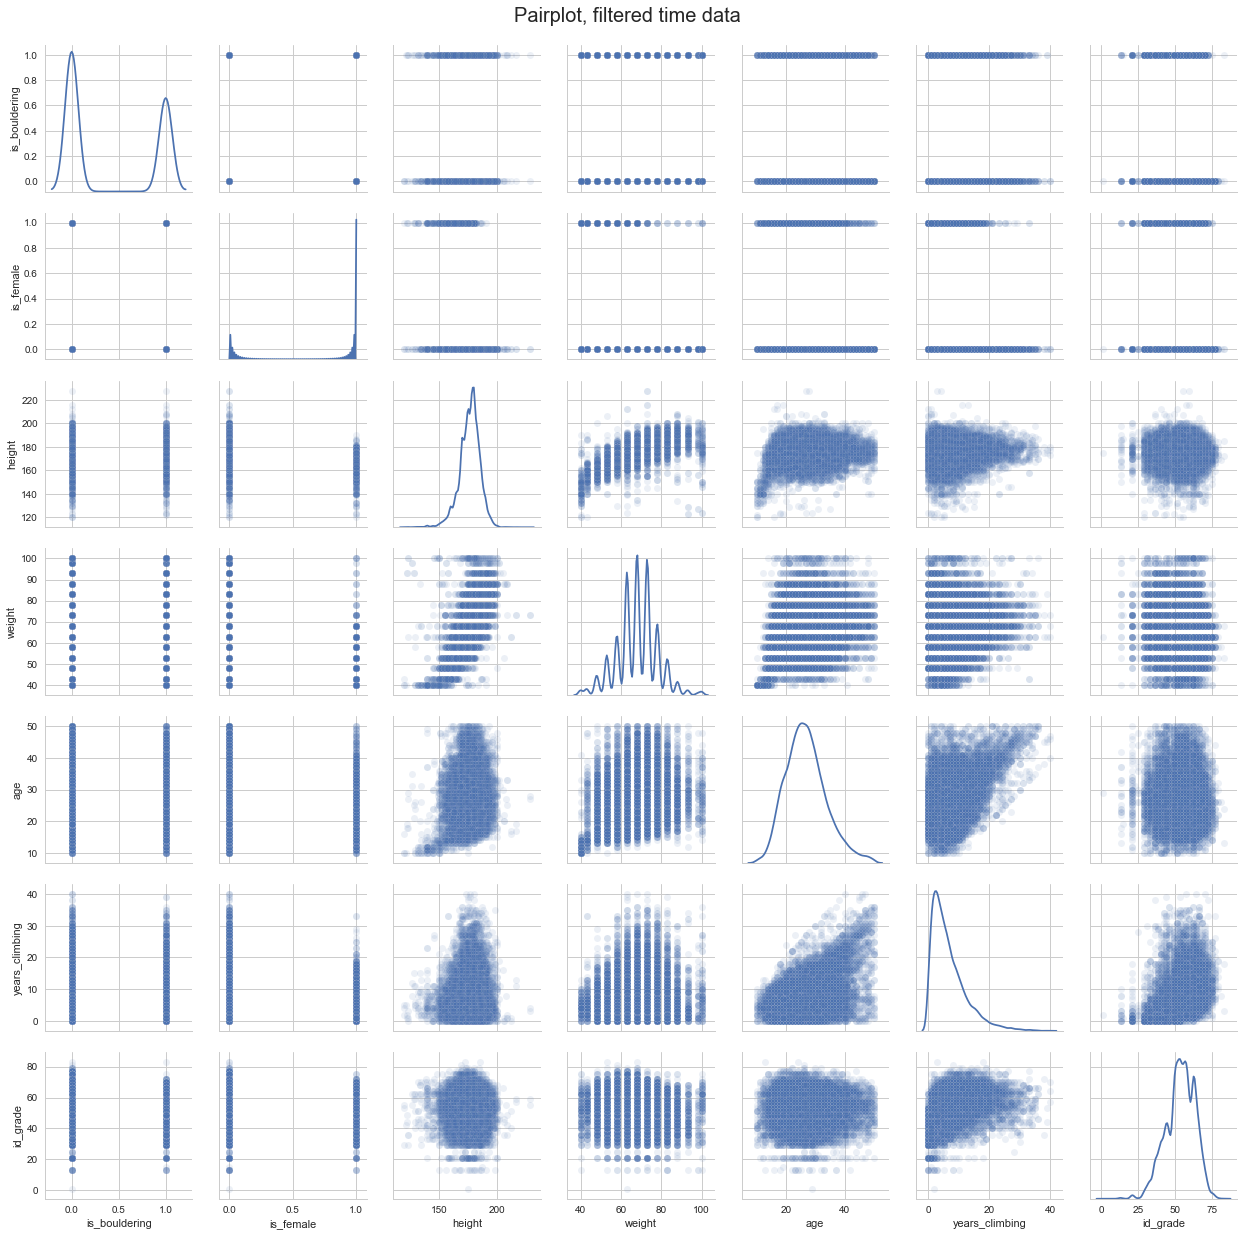

In [109]:
# ---- PAIRPLOT, ALL DATA ----
sns.set(style="whitegrid")
g = sns.pairplot(df_all[
    (df_all['height'] >= 120) & (df_all['height'] <= 240) &
    (df_all['weight'] != 0) & 
    (df_all['age'] >= 10) & (df_all['age'] <= 50) & 
    (df_all['years_climbing'] >= 0) & (df_all['years_climbing'] <= 40)]\
                 [['is_bouldering','is_female','height','weight','age','years_climbing','id_grade']], 
                 diag_kind='kde', dropna=True, plot_kws={'alpha':'0.1'})
g.fig.suptitle("Pairplot, filtered time data", size=20)
plt.subplots_adjust(top=0.95)

In [110]:
# ===================================
#
# VISUALIZATIONS
#
# ===================================

In [111]:
# ===================================
# MEAN GRADE VS HEIGHT

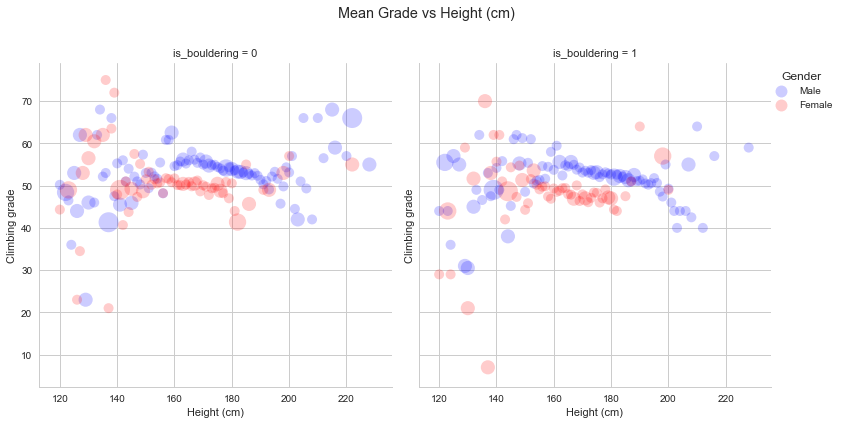

In [112]:
sns.set(style='whitegrid')
g = sns.lmplot(x='height', y='id_grade', hue='is_female', palette=dict({0:'blue', 1:'red'}),
               size=6, col='is_bouldering', legend=False, fit_reg=False, scatter_kws={
                       'alpha':'0.2',
                       's':100*df_all[(df_all['height'] >= 120) & (df_all['height'] <= 240)]\
                               .groupby(['height','id_grade']).count()['id_user']},
               data=df_all[(df_all['height'] >= 120) & (df_all['height'] <= 240)]\
                       .groupby(by=['is_female','height','is_bouldering'], as_index=False)\
                       .mean()[['is_female','is_bouldering','height','id_grade']])
g.fig.suptitle('Mean Grade vs Height (cm)')
g.set(xlabel='Height (cm)', ylabel='Climbing grade')
plt.legend(bbox_to_anchor=(1.2, 1), markerscale=0.1, 
          title='Gender', labels=['Male','Female'])
g.fig.tight_layout()
plt.subplots_adjust(top=0.85)

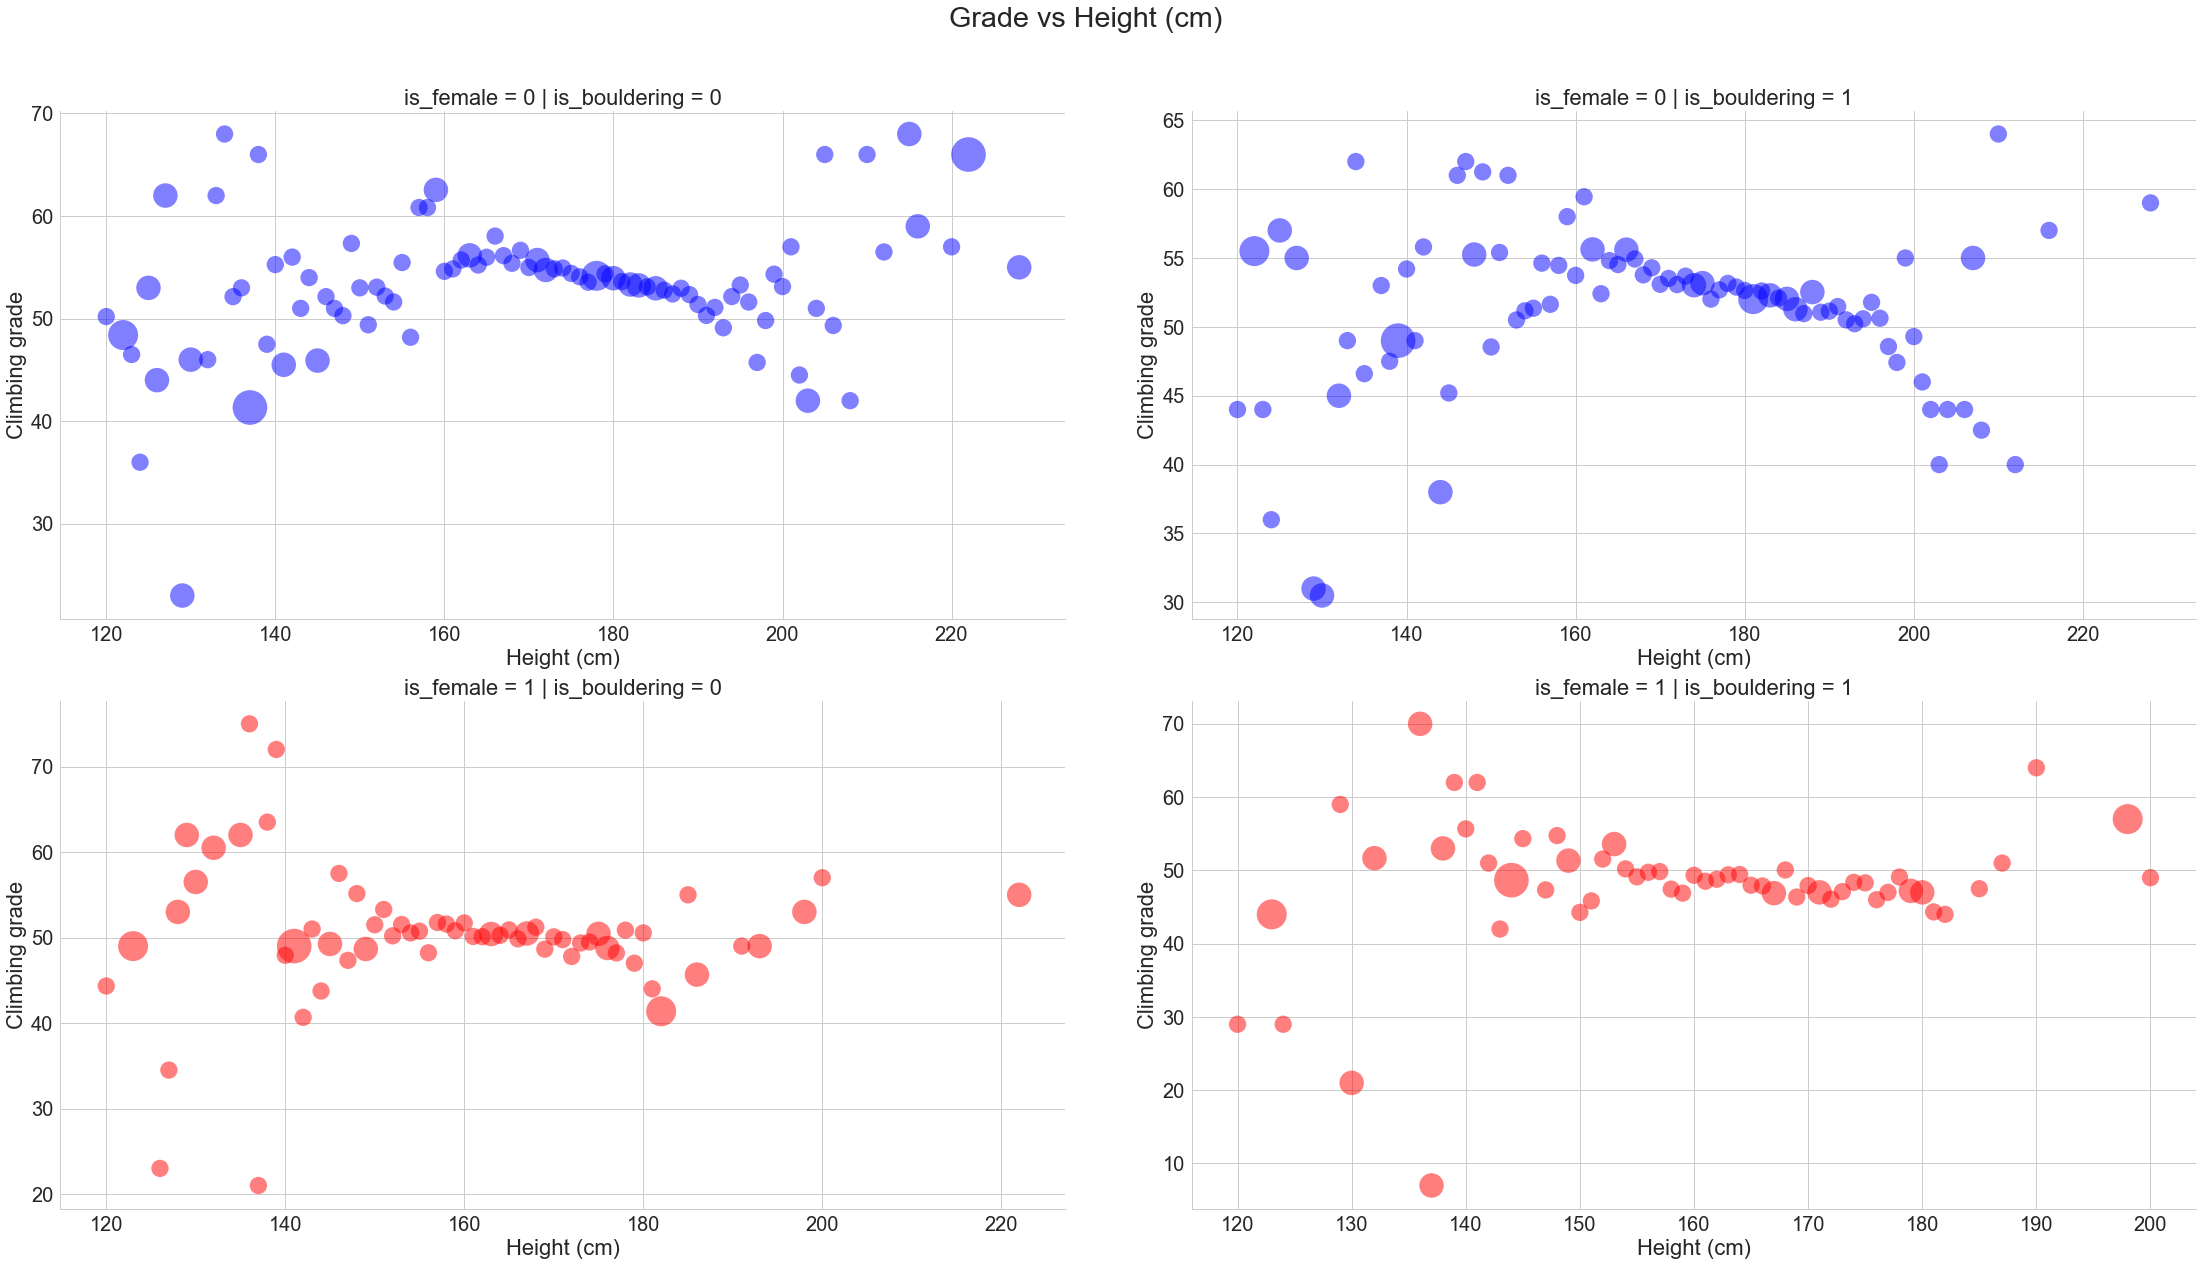

In [113]:
sns.set(style='whitegrid', font_scale=2)
g = sns.lmplot(x='height', y='id_grade', 
               size=10, col='is_bouldering', row='is_female', legend=False, fit_reg=False,
               hue='is_female', palette=dict({0:'blue', 1:'red'}), sharex=False, sharey=False, 
               scatter_kws={
                       'alpha':'0.5',
                       's':300*df_all[(df_all['height'] >= 120) & (df_all['height'] <= 240)]\
                   .groupby(['height','id_grade']).count()['id_user']},
               data=df_all[(df_all['height'] >= 120) & (df_all['height'] <= 240)]\
               .groupby(by=['is_female','height','is_bouldering'], as_index=False)\
                       .mean()[['is_female','is_bouldering','height','id_grade']])
g.fig.suptitle('Grade vs Height (cm)')
plt.subplots_adjust(top=0.90)
g.set(xlabel='Height (cm)', ylabel='Climbing grade')
g.fig.tight_layout()
g.fig.set_figheight(18)
g.fig.set_figwidth(32)
plt.subplots_adjust(top=0.90)

In [114]:
# ===================================
# MEAN GRADE VS WEIGHT

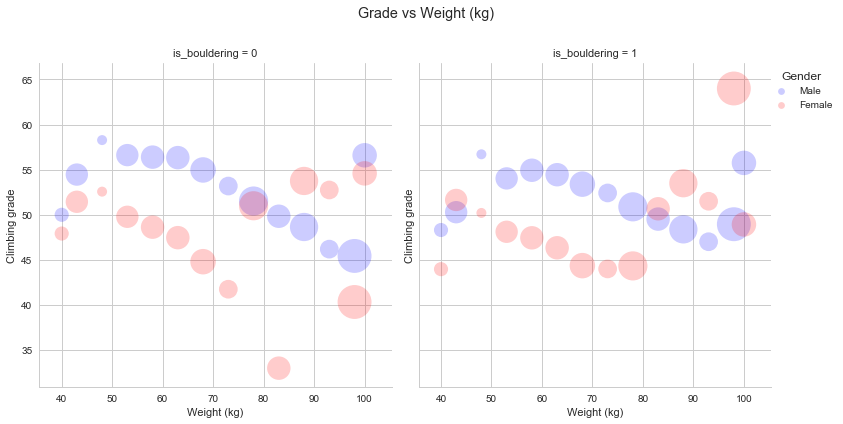

In [115]:
sns.set(style='whitegrid')
g = sns.lmplot(x='weight', y='id_grade',
              hue='is_female', palette=dict({0:'blue', 1:'red'}),
               size=6, col='is_bouldering', legend=False, fit_reg=False,
               scatter_kws={
                       'alpha':'0.2',
                       's':50*df_all[(df_all['weight'] != 0)]\
                               .groupby(['weight','id_grade']).count()['id_user']},
               data=df_all[(df_all['weight'] != 0)]\
                       .groupby(by=['is_female','weight','is_bouldering'], as_index=False)\
                       .mean()[['is_female','is_bouldering','weight','id_grade']])
g.fig.suptitle('Grade vs Weight (kg)')
g.set(xlabel='Weight (kg)', ylabel='Climbing grade')
plt.legend(bbox_to_anchor=(1.2, 1), markerscale=0.05,
          title='Gender', labels=['Male','Female'])
g.fig.tight_layout()
plt.subplots_adjust(top=0.85)

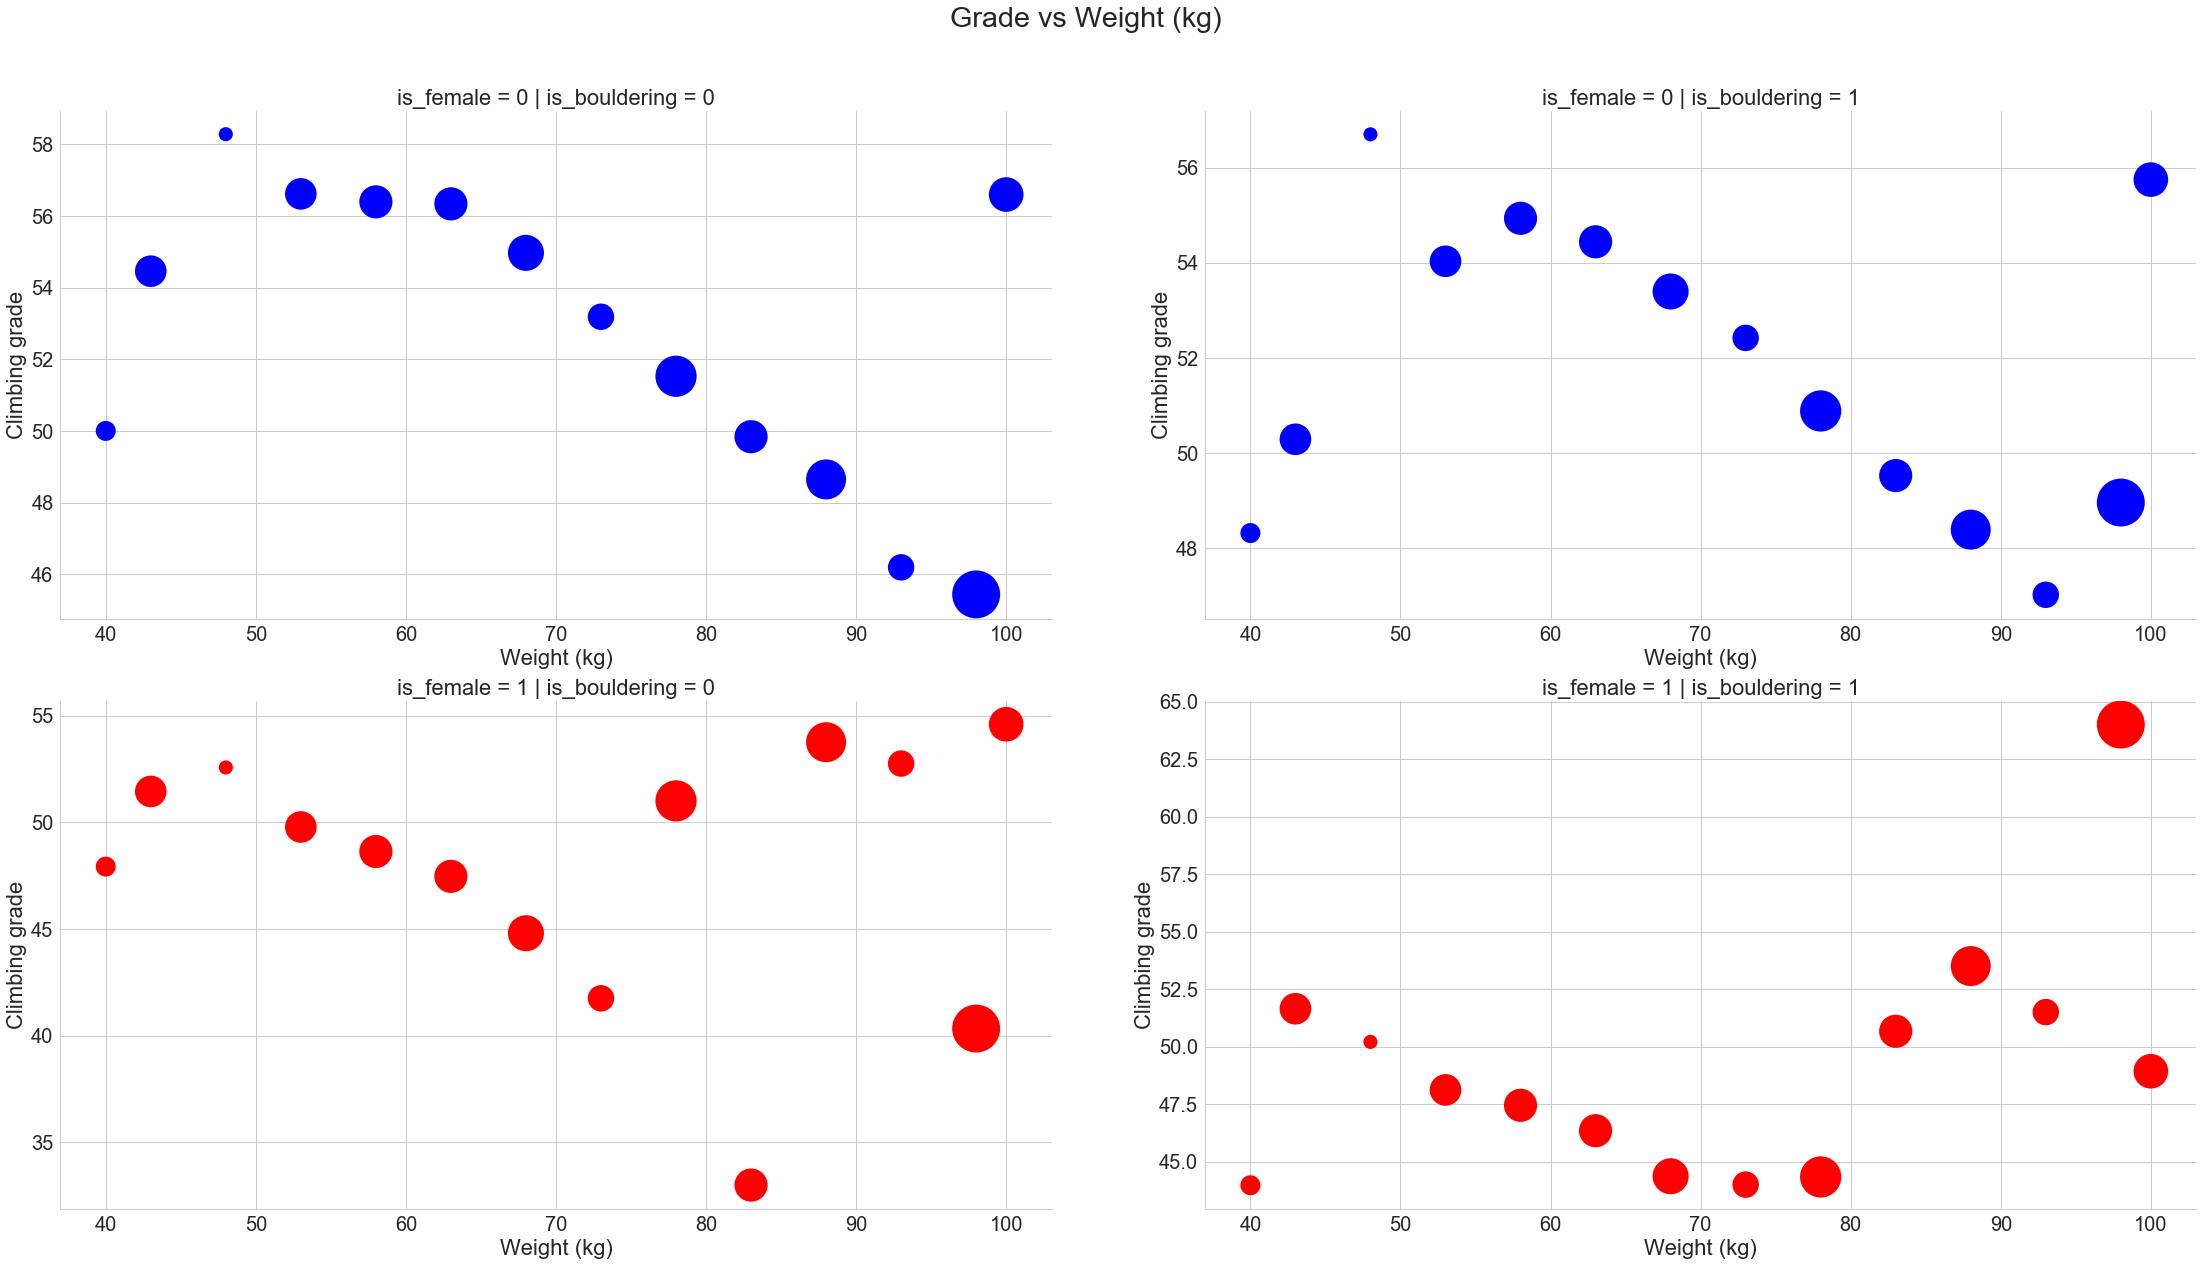

In [116]:
sns.set(style='whitegrid', font_scale=2)
g = sns.lmplot(x='weight', y='id_grade', hue='is_female', palette=dict({0:'blue', 1:'red'}),
               size=10, col='is_bouldering', row='is_female', legend=False, fit_reg=False,
               sharex=False, sharey=False,
               scatter_kws={
                       'alpha':'1',
                       's':100*df_all[(df_all['weight'] != 0)].groupby(['weight','id_grade']).count()['id_user']},
               data=df_all[(df_all['weight'] != 0)].groupby(by=['is_female','weight','is_bouldering'], as_index=False)\
                       .mean()[['is_female','is_bouldering','weight','id_grade']])
g.fig.suptitle('Grade vs Weight (kg)')
plt.subplots_adjust(top=0.90)
g.set(xlabel='Weight (kg)', ylabel='Climbing grade')
g.fig.tight_layout()
g.fig.set_figheight(18)
g.fig.set_figwidth(32)
plt.subplots_adjust(top=0.90)

In [117]:
# ===================================
# MEAN GRADE VS YEARS CLIMBING

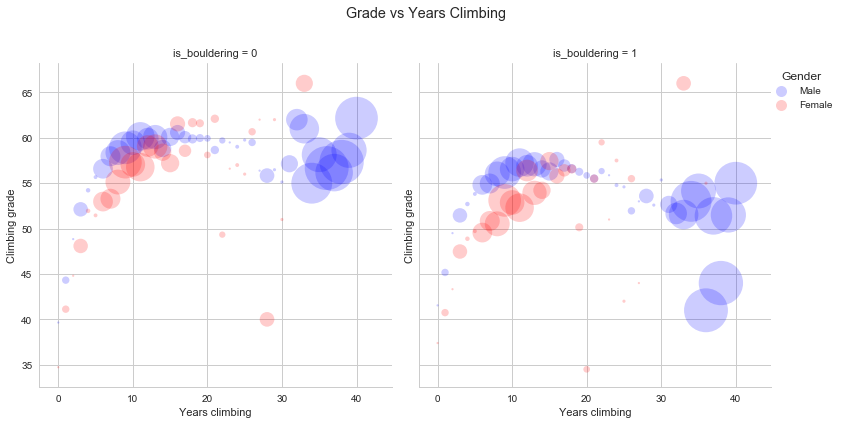

In [118]:
sns.set(style='whitegrid')
g = sns.lmplot(x='years_climbing', y='id_grade',
              hue='is_female', palette=dict({0:'blue', 1:'red'}),
               size=6, col='is_bouldering', legend=False, fit_reg=False,
               scatter_kws={
                       'alpha':'0.2',
                       's':5*df_all[(df_all['years_climbing'] >= 0) & (df_all['years_climbing'] <= 40)]\
                               .groupby(['years_climbing','id_grade']).count()['id_user']},
               data=df_all[(df_all['years_climbing'] >= 0) & (df_all['years_climbing'] <= 40)]\
                       .groupby(by=['is_female','years_climbing','is_bouldering'], as_index=False)\
                       .mean()[['is_female','is_bouldering','years_climbing','id_grade']])
g.fig.suptitle('Grade vs Years Climbing')
g.set(xlabel='Years climbing', ylabel='Climbing grade')
plt.legend(bbox_to_anchor=(1.2, 1), markerscale=0.3,
          title='Gender', labels=['Male','Female'])
g.fig.tight_layout()
plt.subplots_adjust(top=0.85)

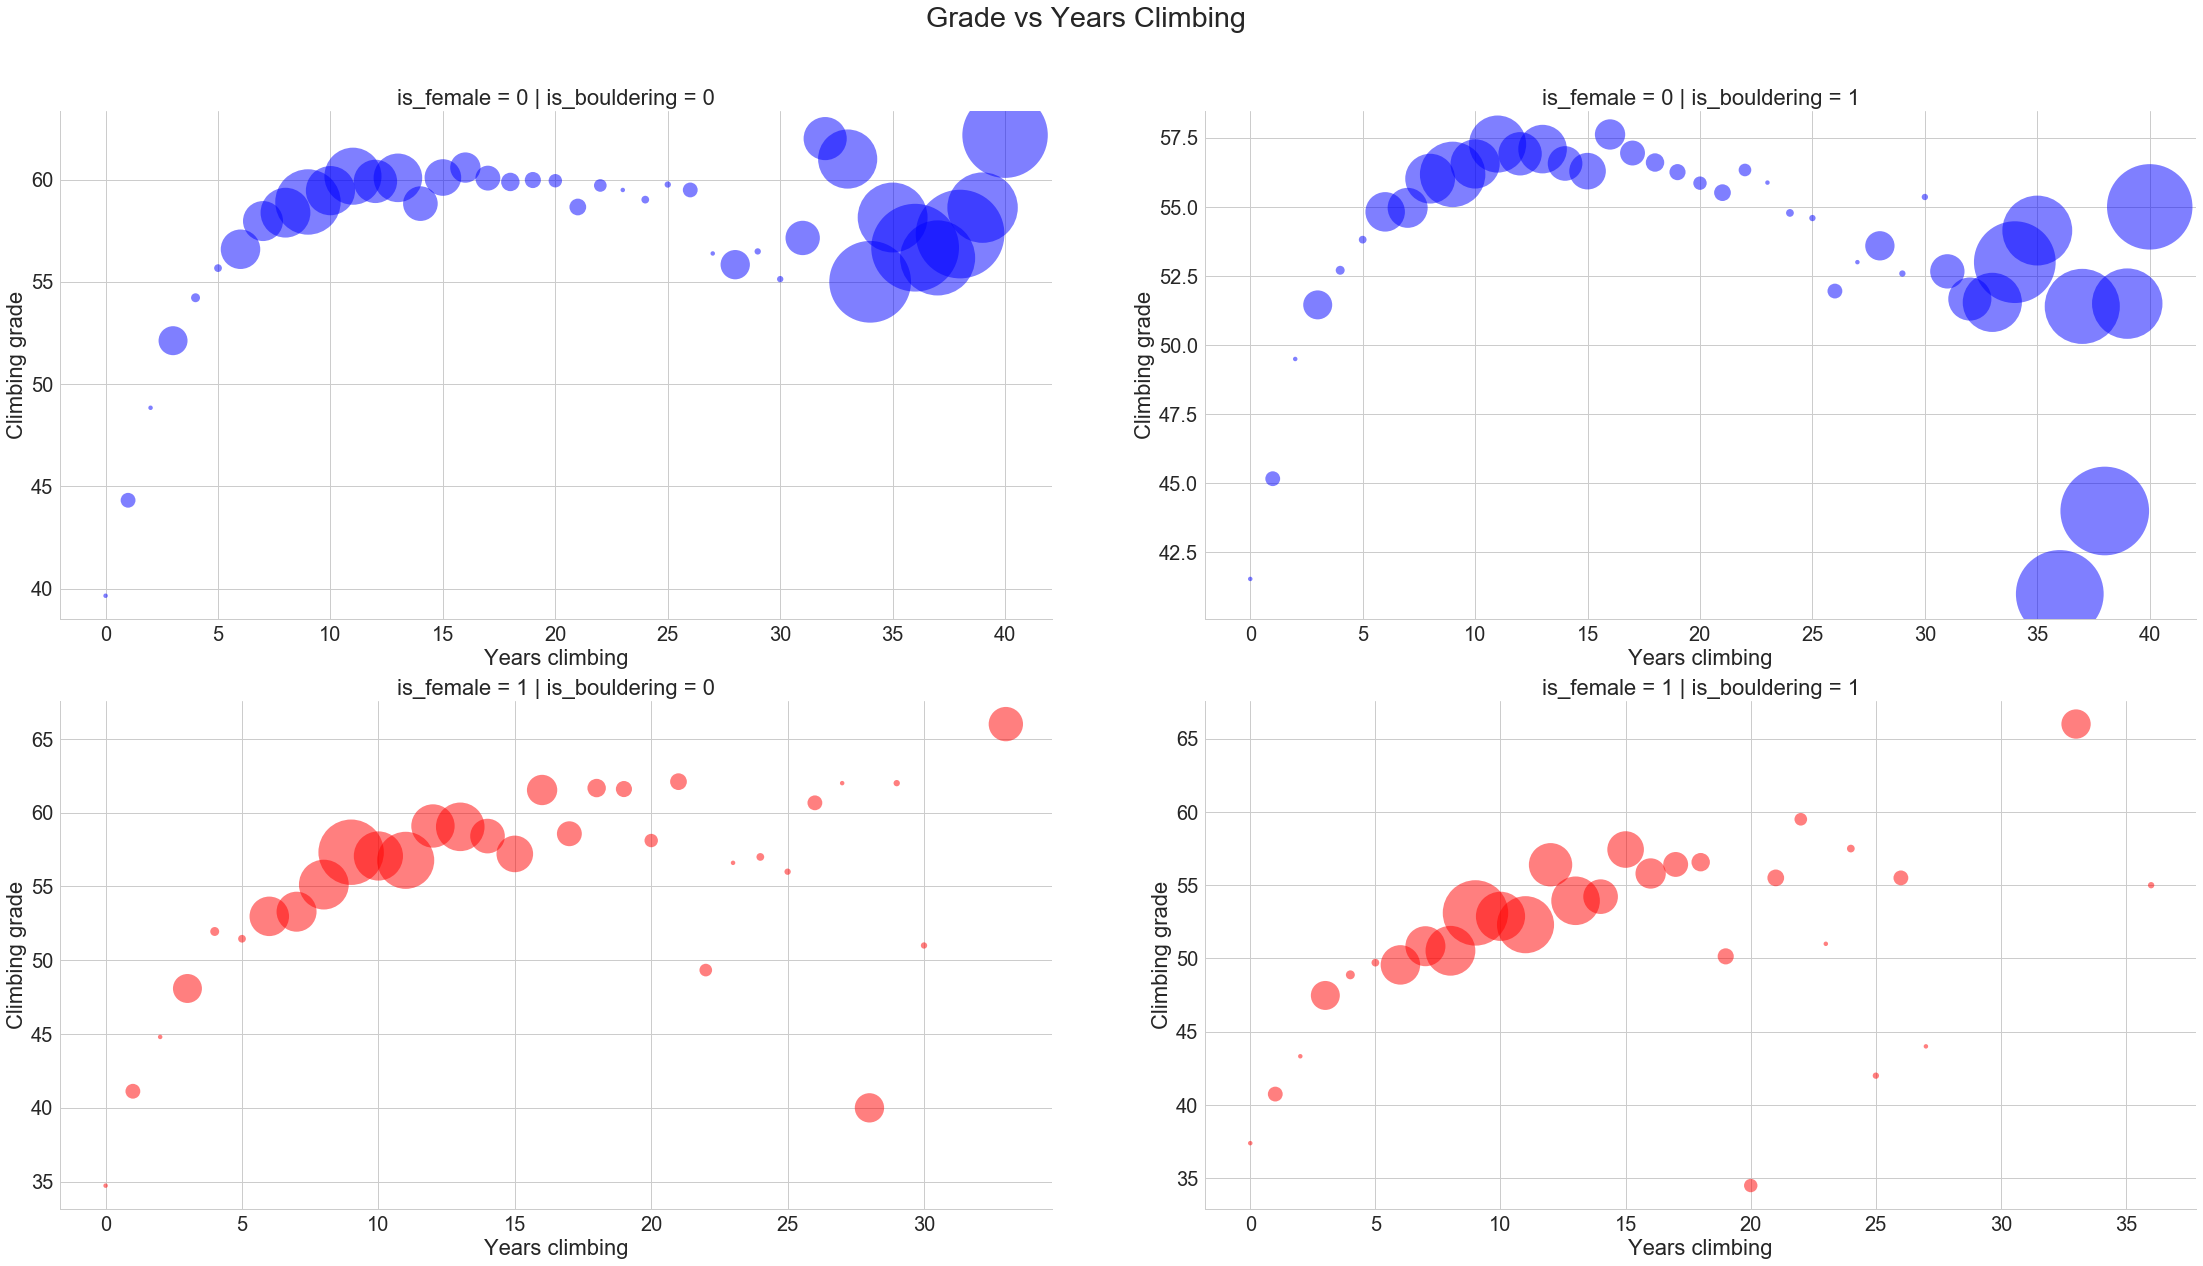

In [119]:
sns.set(style='whitegrid', font_scale=2)
g = sns.lmplot(x='years_climbing', y='id_grade', hue='is_female', palette=dict({0:'blue', 1:'red'}),
               size=10, col='is_bouldering', row='is_female', legend=False, fit_reg=False,
               sharex=False, sharey=False,
               scatter_kws={
                       'alpha':'0.5',
                       's':20*df_all[(df_all['years_climbing'] >= 0) & (df_all['years_climbing'] <= 40)]\
                               .groupby(['years_climbing','id_grade']).count()['id_user']},
               data=df_all[(df_all['years_climbing'] >= 0) & (df_all['years_climbing'] <= 40)]\
                       .groupby(by=['is_female','years_climbing','is_bouldering'], as_index=False)\
                       .mean()[['is_female','is_bouldering','years_climbing','id_grade']])
g.fig.suptitle('Grade vs Years Climbing')
plt.subplots_adjust(top=0.90)
g.set(xlabel='Years climbing', ylabel='Climbing grade')
g.fig.tight_layout()
g.fig.set_figheight(18)
g.fig.set_figwidth(32)
plt.subplots_adjust(top=0.90)

In [120]:
# ===================================
# MEAN GRADE VS AGE

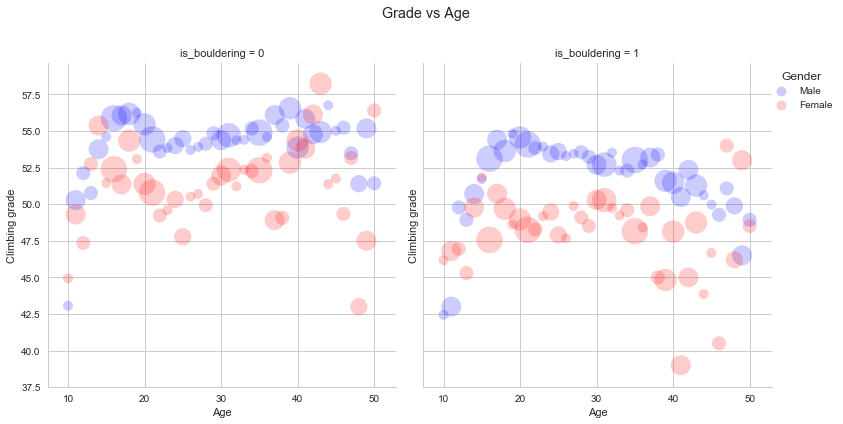

In [121]:
sns.set(style='whitegrid')
g = sns.lmplot(x='age', y='id_grade',
              hue='is_female', palette=dict({0:'blue', 1:'red'}),
               size=6, col='is_bouldering', legend=False, fit_reg=False,
               scatter_kws={
                       'alpha':'0.2',
                       's':100*df_all[(df_all['age'] >= 10) & (df_all['age'] <= 50)]\
                               .groupby(['age','id_grade']).count()['id_user']},
               data=df_all[(df_all['age'] >= 10) & (df_all['age'] <= 50)]\
                       .groupby(by=['is_female','age','is_bouldering'], as_index=False)\
                       .mean()[['is_female','is_bouldering','age','id_grade']])
g.fig.suptitle('Grade vs Age')
g.set(xlabel='Age', ylabel='Climbing grade')
plt.legend(bbox_to_anchor=(1.2, 1), markerscale=0.1,
          title='Gender', labels=['Male','Female'])
g.fig.tight_layout()
plt.subplots_adjust(top=0.85)

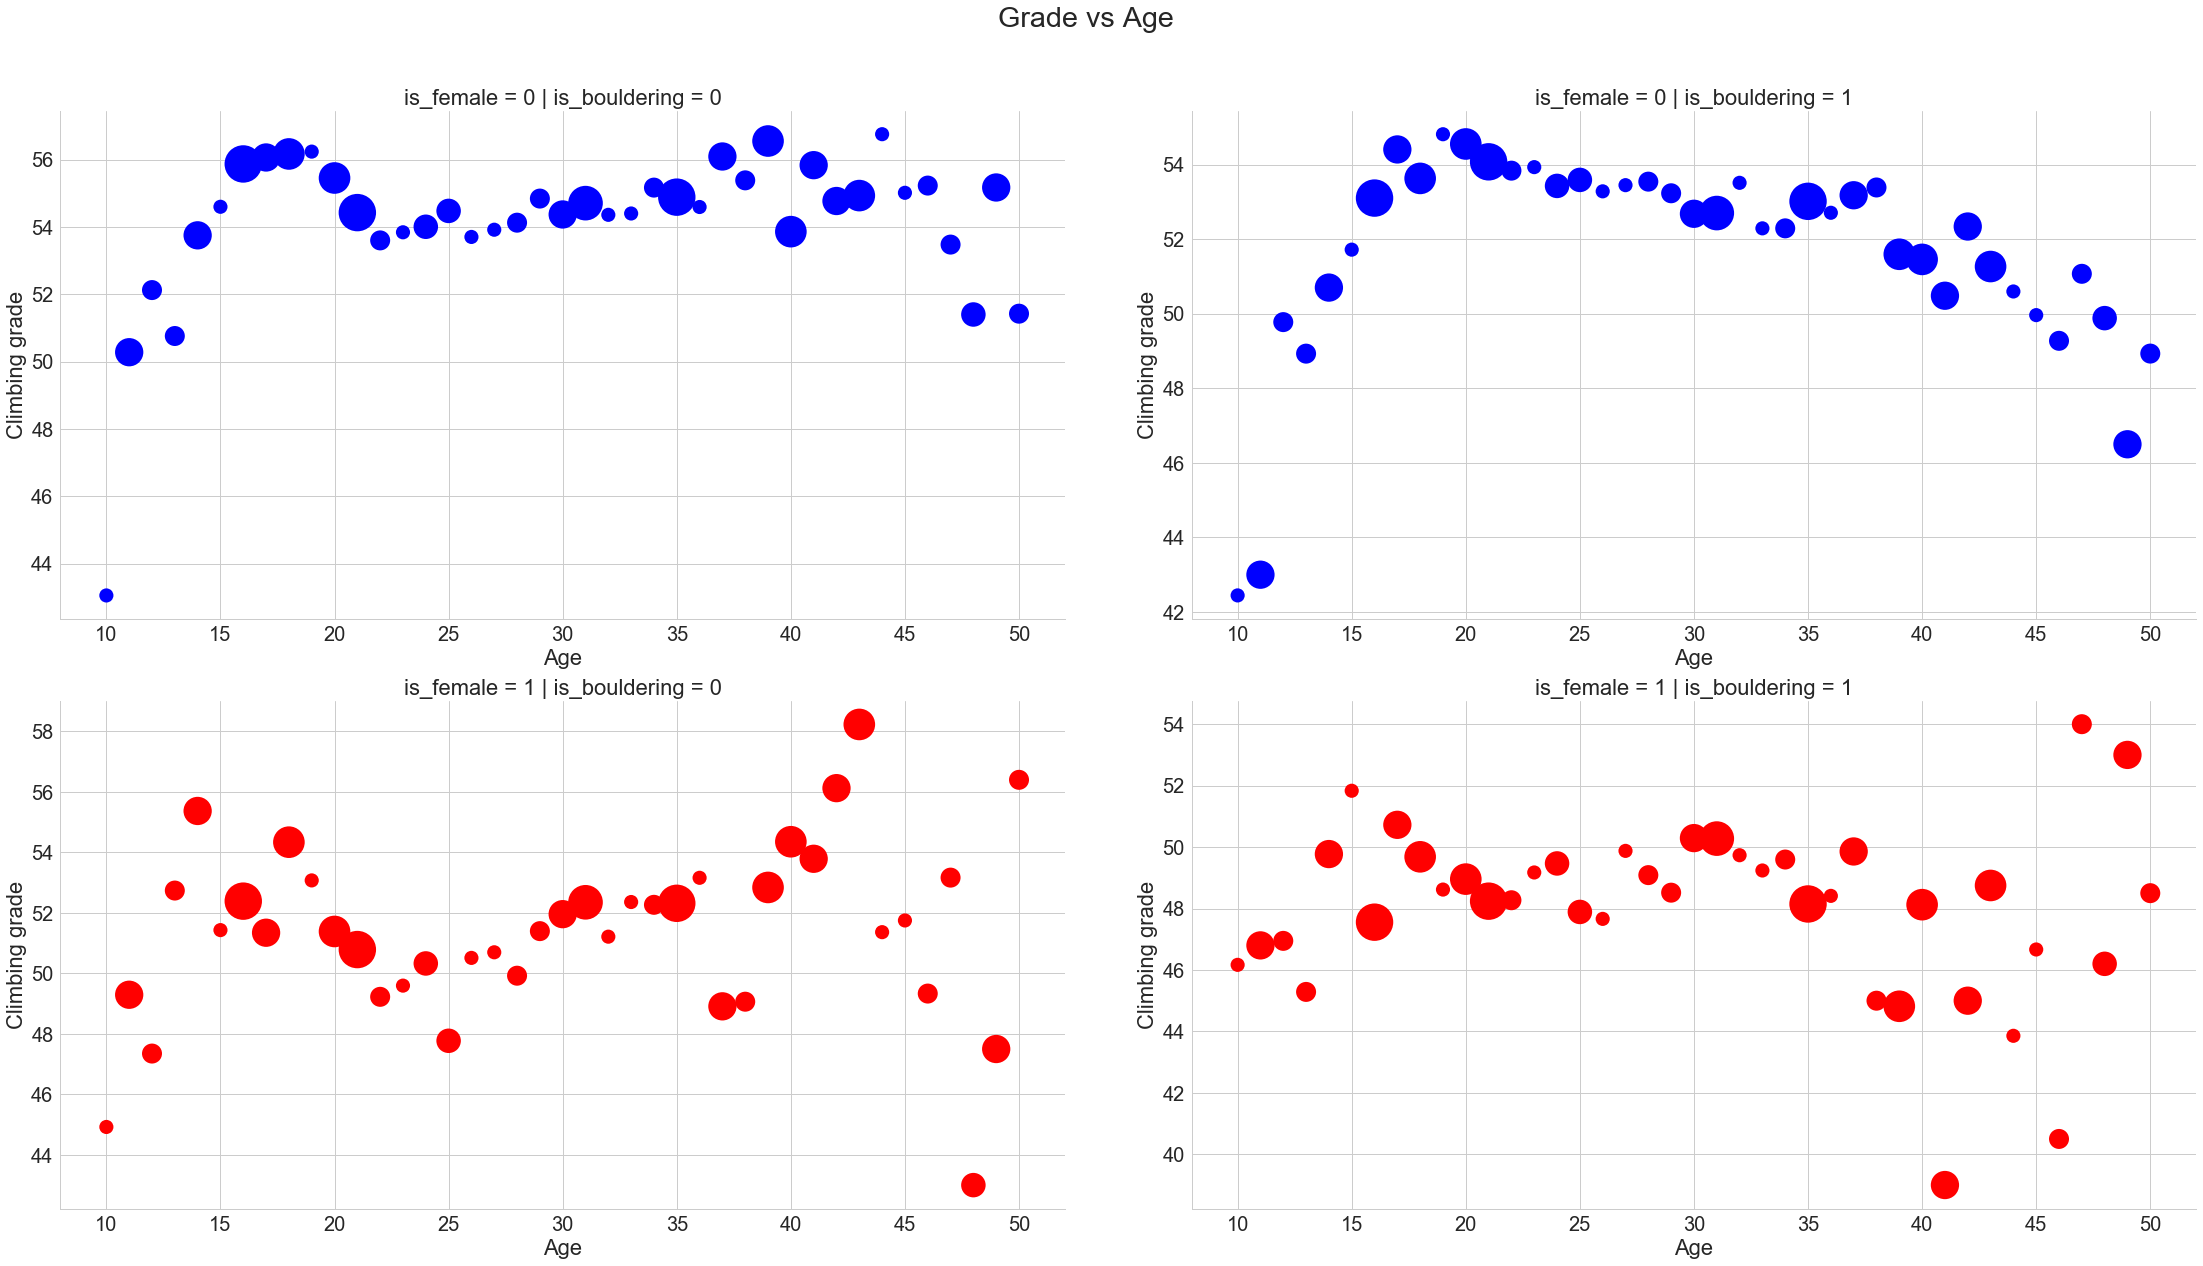

In [122]:
sns.set(style='whitegrid', font_scale=2)
g = sns.lmplot(x='age', y='id_grade', hue='is_female', palette=dict({0:'blue', 1:'red'}),
               size=10, col='is_bouldering', row='is_female', legend=False, fit_reg=False,
               sharex=False, sharey=False,
               scatter_kws={
                       'alpha':'1',
                       's':200*df_all[(df_all['age'] >= 10) & (df_all['age'] <= 50)]\
                               .groupby(['age','id_grade']).count()['id_user']},
               data=df_all[(df_all['age'] >= 10) & (df_all['age'] <= 50)]\
                       .groupby(by=['is_female','age','is_bouldering'], as_index=False)\
                       .mean()[['is_female','is_bouldering','age','id_grade']])
g.fig.suptitle('Grade vs Age')
plt.subplots_adjust(top=0.90)
g.set(xlabel='Age', ylabel='Climbing grade')
g.fig.tight_layout()
g.fig.set_figheight(18)
g.fig.set_figwidth(32)
plt.subplots_adjust(top=0.90)

In [123]:
# ===================================
#
# STATISTICAL ANALYSES
#
# ===================================

In [124]:
# -----------------------------------
# UNIVARIATE ANALYSES

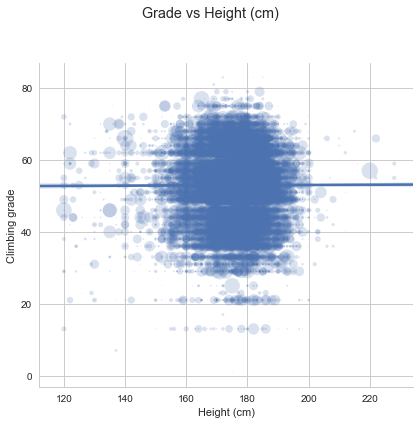

In [125]:
# Plot grade vs height
sns.set(style='whitegrid')
g = sns.lmplot(x='height', y='id_grade', size=6, fit_reg=True, 
               scatter_kws={
                       'alpha':'0.2',
                       's':df_all[(df_all['height'] >= 120) & (df_all['height'] <= 240)]\
                               .groupby(['height','id_grade']).count()['id_user']},
               data=df_all[(df_all['height'] >= 120) & (df_all['height'] <= 240)])
g.fig.suptitle('Grade vs Height (cm)')
g.set(xlabel='Height (cm)', ylabel='Climbing grade')
g.fig.tight_layout()
plt.subplots_adjust(top=0.85)

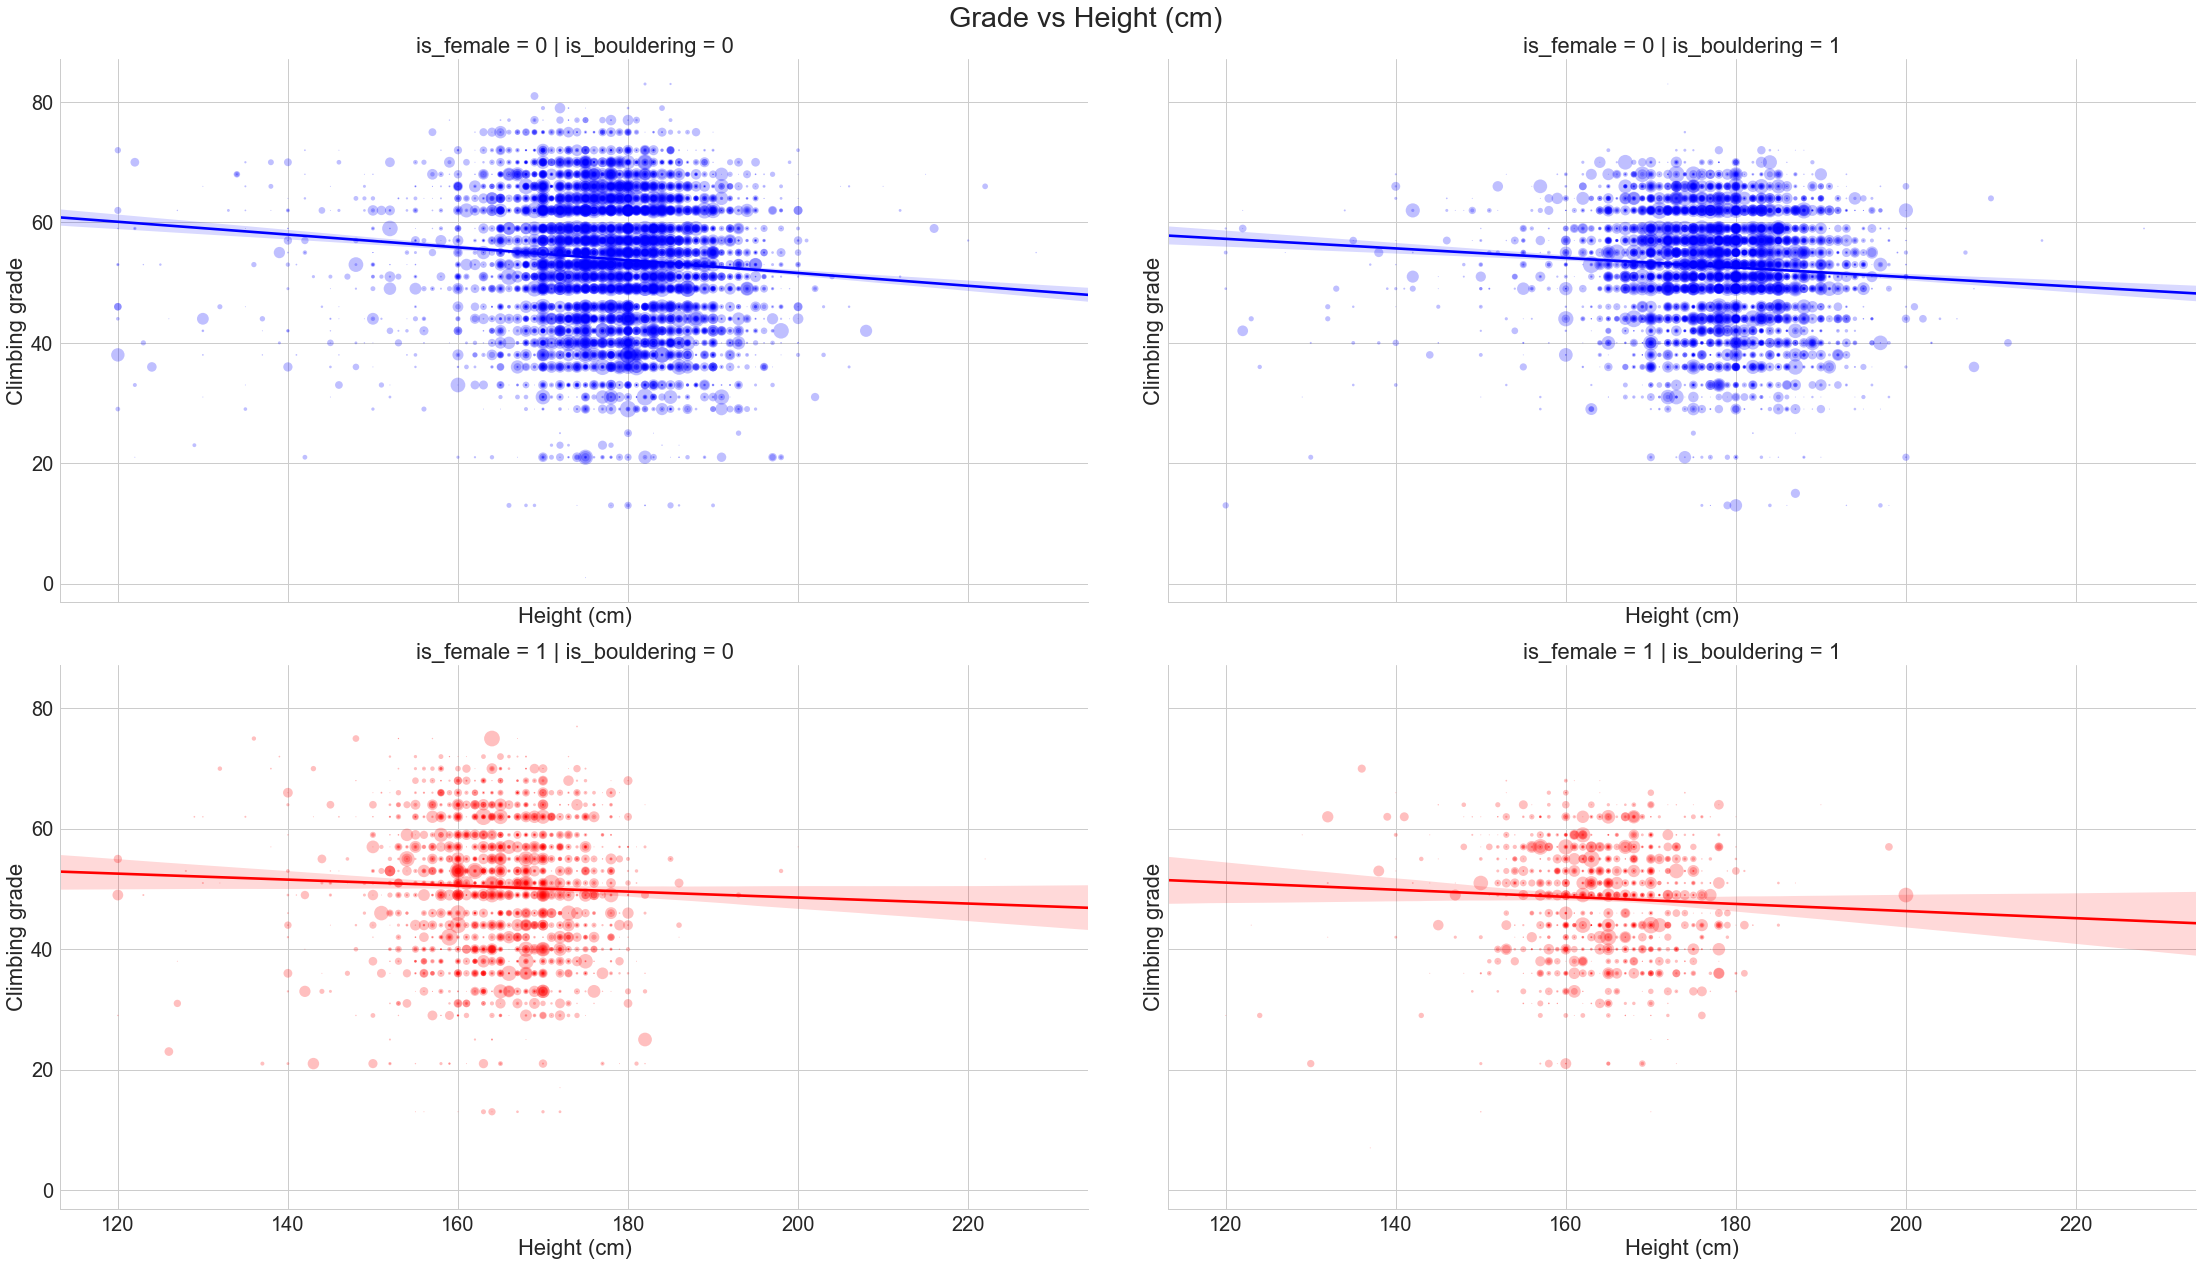

In [126]:
sns.set(style='whitegrid', font_scale=2)
g = sns.lmplot(x='height', y='id_grade', hue='is_female', palette=dict({0:'blue', 1:'red'}),
               size=10, col='is_bouldering', row='is_female', legend=False, fit_reg=True,
               scatter_kws={
                       'alpha':'0.25',
                       's':1*df_all[(df_all['height'] >= 120) & (df_all['height'] <= 240)]\
                               .groupby(['height','id_grade']).count()['id_user']},
               data=df_all[(df_all['height'] >= 120) & (df_all['height'] <= 240)])
g.fig.suptitle('Grade vs Height (cm)')
g.set(xlabel='Height (cm)', ylabel='Climbing grade')
g.fig.tight_layout()
g.fig.set_figheight(18)
g.fig.set_figwidth(32)
plt.subplots_adjust(top=0.94)

In [127]:
df_results_univariate = pd.DataFrame(columns=['Variable','Type','Gender','Coefficient','Std_error','P_value'])

In [128]:
df_results_univariate

,Variable,Type,Gender,Coefficient,Std_error,P_value


In [129]:
# Linear regression fit
lm_grade_vs_height_bouldering_female = \
        smf.ols('id_grade ~ height', 
                data=df_bouldering_female[
                    (df_bouldering_female['height'] >= 120) & 
                    (df_bouldering_female['height'] <= 240)]).fit()

print(lm_grade_vs_height_bouldering_female.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Height (cm)',
        'Type': 'Bouldering',
        'Gender': 'F',
        'Coefficient': round(lm_grade_vs_height_bouldering_female.params[1],3),
        'Std_error': round(lm_grade_vs_height_bouldering_female.bse[1],3),
        'P_value': round(lm_grade_vs_height_bouldering_female.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

                            OLS Regression Results                            
Dep. Variable:               id_grade   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.841
Date:                Thu, 21 Mar 2019   Prob (F-statistic):             0.0502
Time:                        12:49:11   Log-Likelihood:                -5267.1
No. Observations:                1462   AIC:                         1.054e+04
Df Residuals:                    1460   BIC:                         1.055e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.1611      4.957     11.734      0.0

In [130]:
# Linear regression fit
lm_grade_vs_height_bouldering_male = \
        smf.ols('id_grade ~ height', 
                data=df_bouldering_male[
                    (df_bouldering_male['height'] >= 120) & 
                    (df_bouldering_male['height'] <= 240)]).fit()

print(lm_grade_vs_height_bouldering_male.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Height (cm)',
        'Type': 'Bouldering',
        'Gender': 'M',
        'Coefficient': round(lm_grade_vs_height_bouldering_male.params[1],3),
        'Std_error': round(lm_grade_vs_height_bouldering_male.bse[1],3),
        'P_value': round(lm_grade_vs_height_bouldering_male.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

                            OLS Regression Results                            
Dep. Variable:               id_grade   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     58.44
Date:                Thu, 21 Mar 2019   Prob (F-statistic):           2.27e-14
Time:                        12:49:11   Log-Likelihood:                -38547.
No. Observations:               10878   AIC:                         7.710e+04
Df Residuals:                   10876   BIC:                         7.711e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.8140      1.850     36.125      0.0

In [131]:
# Linear regression fit
lm_grade_vs_height_rope_female = \
        smf.ols('id_grade ~ height', 
                data=df_rope_female[
                    (df_rope_female['height'] >= 120) & 
                    (df_rope_female['height'] <= 240)]).fit()

print(lm_grade_vs_height_rope_female.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Height (cm)',
        'Type': 'Rope',
        'Gender': 'F',
        'Coefficient': round(lm_grade_vs_height_rope_female.params[1],3),
        'Std_error': round(lm_grade_vs_height_rope_female.bse[1],3),
        'P_value': round(lm_grade_vs_height_rope_female.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

                            OLS Regression Results                            
Dep. Variable:               id_grade   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.649
Date:                Thu, 21 Mar 2019   Prob (F-statistic):             0.0562
Time:                        12:49:11   Log-Likelihood:                -10348.
No. Observations:                2738   AIC:                         2.070e+04
Df Residuals:                    2736   BIC:                         2.071e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.5173      4.290     13.640      0.0

In [132]:
# Linear regression fit
lm_grade_vs_height_rope_male = \
        smf.ols('id_grade ~ height', 
                data=df_rope_male[
                    (df_rope_male['height'] >= 120) & 
                    (df_rope_male['height'] <= 240)]).fit()

print(lm_grade_vs_height_rope_male.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Height (cm)',
        'Type': 'Rope',
        'Gender': 'M',
        'Coefficient': round(lm_grade_vs_height_rope_male.params[1],3),
        'Std_error': round(lm_grade_vs_height_rope_male.bse[1],3),
        'P_value': round(lm_grade_vs_height_rope_male.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

                            OLS Regression Results                            
Dep. Variable:               id_grade   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     117.4
Date:                Thu, 21 Mar 2019   Prob (F-statistic):           2.87e-27
Time:                        12:49:11   Log-Likelihood:                -62322.
No. Observations:               16744   AIC:                         1.246e+05
Df Residuals:                   16742   BIC:                         1.247e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.8798      1.747     41.718      0.0

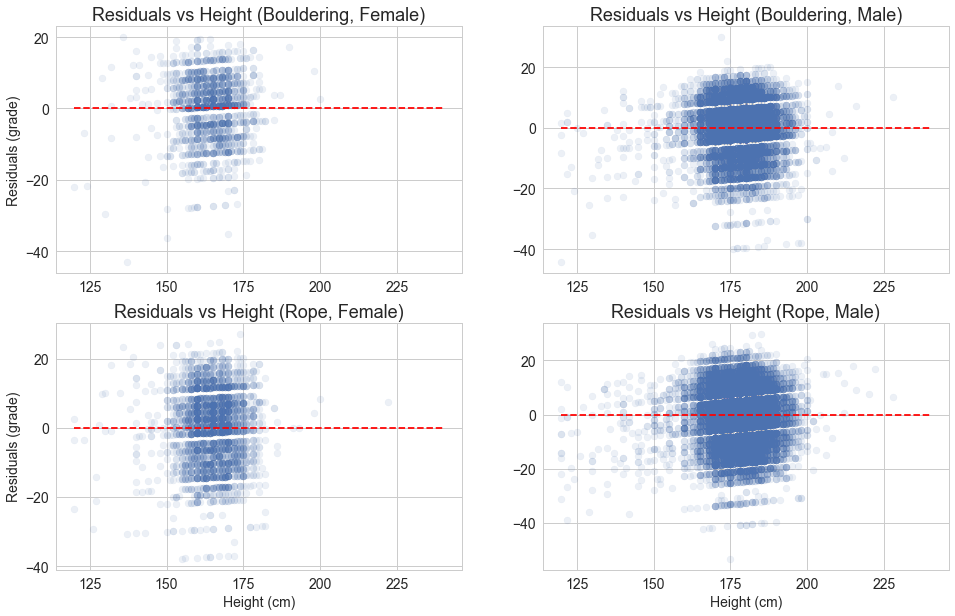

In [133]:
# Plot residuals
fig, ax = plt.subplots(2, 2, figsize=(16,10))

ax[0,0].scatter(x=df_bouldering_female[
                    (df_bouldering_female['height'] >= 120) & 
                    (df_bouldering_female['height'] <= 240)]['height'], 
            y=lm_grade_vs_height_bouldering_female.resid, alpha=0.1)
ax[0,0].hlines(y=0, xmin=120, xmax=240, colors='red', linestyles='dashed')
ax[0,0].set_title('Residuals vs Height (Bouldering, Female)', fontsize=18)
ax[0,0].set_ylabel('Residuals (grade)', fontsize=14)
plt.setp(ax[0,0].get_xticklabels(), fontsize=14)
plt.setp(ax[0,0].get_yticklabels(), fontsize=14)

ax[0,1].scatter(x=df_bouldering_male[
                    (df_bouldering_male['height'] >= 120) & 
                    (df_bouldering_male['height'] <= 240)]['height'], 
            y=lm_grade_vs_height_bouldering_male.resid, alpha=0.1)
ax[0,1].hlines(y=0, xmin=120, xmax=240, colors='red', linestyles='dashed')
ax[0,1].set_title('Residuals vs Height (Bouldering, Male)', fontsize=18)
plt.setp(ax[0,1].get_xticklabels(), fontsize=14)
plt.setp(ax[0,1].get_yticklabels(), fontsize=14)

ax[1,0].scatter(x=df_rope_female[
                    (df_rope_female['height'] >= 120) & 
                    (df_rope_female['height'] <= 240)]['height'], 
            y=lm_grade_vs_height_rope_female.resid, alpha=0.1)
ax[1,0].hlines(y=0, xmin=120, xmax=240, colors='red', linestyles='dashed')
ax[1,0].set_title('Residuals vs Height (Rope, Female)', fontsize=18)
ax[1,0].set_xlabel('Height (cm)', fontsize=14)
ax[1,0].set_ylabel('Residuals (grade)', fontsize=14)
plt.setp(ax[1,0].get_xticklabels(), fontsize=14)
plt.setp(ax[1,0].get_yticklabels(), fontsize=14)

ax[1,1].scatter(x=df_rope_male[
                    (df_rope_male['height'] >= 120) & 
                    (df_rope_male['height'] <= 240)]['height'], 
            y=lm_grade_vs_height_rope_male.resid, alpha=0.1)
ax[1,1].hlines(y=0, xmin=120, xmax=240, colors='red', linestyles='dashed')
ax[1,1].set_title('Residuals vs Height (Rope, Male)', fontsize=18)
ax[1,1].set_xlabel('Height (cm)', fontsize=14)
plt.setp(ax[1,1].get_xticklabels(), fontsize=14)
plt.setp(ax[1,1].get_yticklabels(), fontsize=14)

plt.show()

In [134]:
print(lm_grade_vs_height_bouldering_female.resid.mean())
print(lm_grade_vs_height_bouldering_male.resid.mean())
print(lm_grade_vs_height_rope_female.resid.mean())
print(lm_grade_vs_height_rope_male.resid.mean())

-1.774898817370647e-14
2.6609100410607832e-14
5.515659352025263e-14
-7.680515458115865e-14


In [135]:
print(lm_grade_vs_height_bouldering_female.resid.sum())
print(lm_grade_vs_height_bouldering_male.resid.sum())
print(lm_grade_vs_height_rope_female.resid.sum())
print(lm_grade_vs_height_rope_male.resid.sum())

-2.6687985155149363e-11
2.014530764427036e-10
1.6109424905152991e-10
-1.3210410543251783e-10


In [ ]:
# QQ plots
fig, ax = plt.subplots(2, 2, figsize=(16,10))

sm.qqplot(lm_grade_vs_height_bouldering_female.resid, line='s', ax=ax[0,0])
sm.qqplot(lm_grade_vs_height_bouldering_male.resid, line='s', ax=ax[0,1])
sm.qqplot(lm_grade_vs_height_rope_female.resid, line='s', ax=ax[1,0])
sm.qqplot(lm_grade_vs_height_rope_male.resid, line='s', ax=ax[1,1])

plt.show()

In [ ]:
# ---- GRADE ~ YEARS_CIMBING

In [ ]:
%matplotlib inline

sns.set(style='whitegrid', font_scale=2)
g = sns.lmplot(x='years_climbing', y='id_grade',
              hue='is_female', palette=dict({0:'blue', 1:'red'}),
               size=6, col='is_bouldering', legend=False, fit_reg=True, row='is_female',
               scatter_kws={
                       'alpha':'0.2',
                       's':df_all[(df_all['years_climbing'] >= 0) & (df_all['years_climbing'] <= 40)]\
                               .groupby(['years_climbing','id_grade']).count()['id_user']},
               data=df_all[(df_all['years_climbing'] >= 0) & (df_all['years_climbing'] <= 40)])
g.fig.suptitle('Grade vs Years Climbing')
g.set(xlabel='Years climbing', ylabel='Climbing grade')
g.fig.tight_layout()
g.fig.set_figheight(18)
g.fig.set_figwidth(32)
plt.subplots_adjust(top=0.94)

In [ ]:
# Linear regression
lm_grade_vs_years_climbing_bouldering_female = \
        smf.ols('id_grade ~ years_climbing', 
                data=df_bouldering_female[(df_bouldering_female['years_climbing'] >= 0) &
                                          (df_bouldering_female['years_climbing'] <= 40)])\
        .fit()

print(lm_grade_vs_years_climbing_bouldering_female.summary())

In [ ]:
lm_grade_vs_years_climbing_bouldering_female.resid.mean()

In [ ]:
lm_grade_vs_years_climbing_bouldering_female.resid.sum()

In [ ]:
# Results
df_results_univariate = pd.DataFrame([{
    'Variable': 'Years climbing (0-40)',
    'Type': 'Bouldering',
    'Gender': 'F',
    'Coefficient': round(lm_grade_vs_years_climbing_bouldering_female.params[1],3),
    'Std_error': round(lm_grade_vs_years_climbing_bouldering_female.bse[1],3),
    'P_value': round(lm_grade_vs_years_climbing_bouldering_female.pvalues[1], 3)
}])

df_results_univariate = df_results_univariate[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate

In [ ]:
lm_grade_vs_years_climbing_bouldering_male = \
        smf.ols('id_grade ~ years_climbing', 
                data=df_bouldering_male[(df_bouldering_male['years_climbing'] >= 0) &
                                          (df_bouldering_male['years_climbing'] <= 40)])\
        .fit()

print(lm_grade_vs_years_climbing_bouldering_male.summary())

In [ ]:
df_results_temp = pd.DataFrame([{
        'Variable': 'Years climbing (0-40)',
        'Type': 'Bouldering',
        'Gender': 'M',
        'Coefficient': round(lm_grade_vs_years_climbing_bouldering_male.params[1],3),
        'Std_error': round(lm_grade_vs_years_climbing_bouldering_male.bse[1],3),
        'P_value': round(lm_grade_vs_years_climbing_bouldering_male.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

df_results_univariate

In [ ]:
lm_grade_vs_years_climbing_rope_female = \
        smf.ols('id_grade ~ years_climbing', 
                data=df_rope_female[(df_rope_female['years_climbing'] >= 0) &
                                          (df_rope_female['years_climbing'] <= 40)])\
        .fit()

print(lm_grade_vs_years_climbing_rope_female.summary())

df_results_temp = pd.DataFrame([{
        'Variable': 'Years climbing (0-40)',
        'Type': 'Rope',
        'Gender': 'F',
        'Coefficient': round(lm_grade_vs_years_climbing_rope_female.params[1],3),
        'Std_error': round(lm_grade_vs_years_climbing_rope_female.bse[1],3),
        'P_value': round(lm_grade_vs_years_climbing_rope_female.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

df_results_univariate

In [ ]:
# Linear regression fit
lm_grade_vs_years_climbing_rope_male = \
        smf.ols('id_grade ~ years_climbing', 
                data=df_rope_male[(df_rope_male['years_climbing'] >= 0) &
                                          (df_rope_male['years_climbing'] <= 40)])\
        .fit()

print(lm_grade_vs_years_climbing_rope_male.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Years climbing (0-40)',
        'Type': 'Rope',
        'Gender': 'M',
        'Coefficient': round(lm_grade_vs_years_climbing_rope_male.params[1],3),
        'Std_error': round(lm_grade_vs_years_climbing_rope_male.bse[1],3),
        'P_value': round(lm_grade_vs_years_climbing_rope_male.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

In [ ]:
# Plot residuals
fig, ax = plt.subplots(2, 2, figsize=(16,10))

ax[0,0].scatter(x=df_bouldering_female[\
                    (df_bouldering_female['years_climbing'] >= 0) & \
                    (df_bouldering_female['years_climbing'] <=40)]['years_climbing'], 
            y=lm_grade_vs_years_climbing_bouldering_female.resid, alpha=0.25)
ax[0,0].hlines(y=0, xmin=0, xmax=40, colors='red', linestyles='dashed')
ax[0,0].set_title('Residuals vs Years Climbing (Bouldering, Female)')
ax[0,0].set_ylabel('Residuals (grade)')

ax[0,1].scatter(x=df_bouldering_male[\
                    (df_bouldering_male['years_climbing'] >= 0) & \
                    (df_bouldering_male['years_climbing'] <=40)]['years_climbing'], 
            y=lm_grade_vs_years_climbing_bouldering_male.resid, alpha=0.25)
ax[0,1].hlines(y=0, xmin=0, xmax=40, colors='red', linestyles='dashed')
ax[0,1].set_title('Residuals vs Years Climbing (Bouldering, Male)')

ax[1,0].scatter(x=df_rope_female[\
                    (df_rope_female['years_climbing'] >= 0) & \
                    (df_rope_female['years_climbing'] <=40)]['years_climbing'], 
            y=lm_grade_vs_years_climbing_rope_female.resid, alpha=0.25)
ax[1,0].hlines(y=0, xmin=0, xmax=40, colors='red', linestyles='dashed')
ax[1,0].set_title('Residuals vs Years Climbing (Rope, Female)')
ax[1,0].set_xlabel('Years climbing')
ax[1,0].set_ylabel('Residuals (grade)')

ax[1,1].scatter(x=df_rope_male[\
                    (df_rope_male['years_climbing'] >= 0) & \
                    (df_rope_male['years_climbing'] <=40)]['years_climbing'], 
            y=lm_grade_vs_years_climbing_rope_male.resid, alpha=0.25)
ax[1,1].hlines(y=0, xmin=0, xmax=40, colors='red', linestyles='dashed')
ax[1,1].set_title('Residuals vs Years Climbing (Rope, Male)')
ax[1,1].set_xlabel('Years climbing')

plt.show()

In [ ]:
# Plot grade vs age
sns.set(style='whitegrid')
g = sns.lmplot(x='age', y='id_grade', size=6, fit_reg=True,
               scatter_kws={
                       'alpha':'0.2',
                       's':df_all[(df_all['age'] >= 10) & (df_all['age'] <= 80)]\
                               .groupby(['age','id_grade']).count()['id_user']},
               data=df_all[(df_all['age'] >= 10) & (df_all['age'] <= 80)])
g.fig.suptitle('Grade vs Age')
g.set(xlabel='Age', ylabel='Climbing grade')
g.fig.tight_layout()
plt.subplots_adjust(top=0.85)

In [ ]:
sns.set(style='whitegrid')
g = sns.lmplot(x='age', y='id_grade',
              hue='is_female', palette=dict({0:'blue', 1:'red'}),
               size=6, col='is_bouldering', row='is_female', legend=False, fit_reg=True,
               scatter_kws={
                       'alpha':'0.2',
                       's':df_all[(df_all['age'] >= 10) & (df_all['age'] <= 80)]\
                               .groupby(['age','id_grade']).count()['id_user']},
               data=df_all[(df_all['age'] >= 10) & (df_all['age'] <= 80)])
g.fig.suptitle('Grade vs Age')
g.set(xlabel='Age', ylabel='Climbing grade')
g.fig.tight_layout()
plt.subplots_adjust(top=0.94)

In [ ]:
# Linear regression fit
lm_grade_vs_age_bouldering_female = \
        smf.ols('id_grade ~ age', 
                data=df_bouldering_female[(df_bouldering_female['age'] >= 10) &
                                          (df_bouldering_female['age'] <= 80)])\
        .fit()

print(lm_grade_vs_age_bouldering_female.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Age (10-80)',
        'Type': 'Bouldering',
        'Gender': 'F',
        'Coefficient': round(lm_grade_vs_age_bouldering_female.params[1],3),
        'Std_error': round(lm_grade_vs_age_bouldering_female.bse[1],3),
        'P_value': round(lm_grade_vs_age_bouldering_female.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

In [ ]:
# Linear regression fit
lm_grade_vs_age_bouldering_male = \
        smf.ols('id_grade ~ age', 
                data=df_bouldering_male[(df_bouldering_male['age'] >= 10) &
                                          (df_bouldering_male['age'] <= 80)])\
        .fit()

print(lm_grade_vs_age_bouldering_male.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Age (10-80)',
        'Type': 'Bouldering',
        'Gender': 'M',
        'Coefficient': round(lm_grade_vs_age_bouldering_male.params[1],3),
        'Std_error': round(lm_grade_vs_age_bouldering_male.bse[1],3),
        'P_value': round(lm_grade_vs_age_bouldering_male.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

In [ ]:
# Linear regression fit
lm_grade_vs_age_rope_female = \
        smf.ols('id_grade ~ age', 
                data=df_rope_female[(df_rope_female['age'] >= 10) &
                                          (df_rope_female['age'] <= 80)])\
        .fit()

print(lm_grade_vs_age_rope_female.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Age (10-80)',
        'Type': 'Rope',
        'Gender': 'F',
        'Coefficient': round(lm_grade_vs_age_rope_female.params[1],3),
        'Std_error': round(lm_grade_vs_age_rope_female.bse[1],3),
        'P_value': round(lm_grade_vs_age_rope_female.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

In [ ]:
# Linear regression fit
lm_grade_vs_age_rope_male = \
        smf.ols('id_grade ~ age', 
                data=df_rope_male[(df_rope_male['age'] >= 10) &
                                          (df_rope_male['age'] <= 80)])\
        .fit()

print(lm_grade_vs_age_rope_male.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Age (10-80)',
        'Type': 'Rope',
        'Gender': 'M',
        'Coefficient': round(lm_grade_vs_age_rope_male.params[1],3),
        'Std_error': round(lm_grade_vs_age_rope_male.bse[1],3),
        'P_value': round(lm_grade_vs_age_rope_male.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

In [ ]:
# Plot residuals
fig, ax = plt.subplots(2, 2, figsize=(16,10))

ax[0,0].scatter(x=df_bouldering_female[\
                    (df_bouldering_female['age'] >= 10) & \
                    (df_bouldering_female['age'] <= 80)]['age'], 
            y=lm_grade_vs_age_bouldering_female.resid, alpha=0.1)
ax[0,0].hlines(y=0, xmin=10, xmax=80, colors='red', linestyles='dashed')
ax[0,0].set_title('Residuals vs Age (Bouldering, Female)')
ax[0,0].set_ylabel('Residuals (grade)')

ax[0,1].scatter(x=df_bouldering_male[\
                    (df_bouldering_male['age'] >= 10) & \
                    (df_bouldering_male['age'] <= 80)]['age'], 
            y=lm_grade_vs_age_bouldering_male.resid, alpha=0.1)
ax[0,1].hlines(y=0, xmin=10, xmax=80, colors='red', linestyles='dashed')
ax[0,1].set_title('Residuals vs Age (Bouldering, Male)')

ax[1,0].scatter(x=df_rope_female[\
                    (df_rope_female['age'] >= 10) & \
                    (df_rope_female['age'] <= 80)]['age'], 
            y=lm_grade_vs_age_rope_female.resid, alpha=0.1)
ax[1,0].hlines(y=0, xmin=0, xmax=70, colors='red', linestyles='dashed')
ax[1,0].set_title('Residuals vs Age (Rope, Female)')
ax[1,0].set_xlabel('Age')
ax[1,0].set_ylabel('Residuals (grade)')

ax[1,1].scatter(x=df_rope_male[\
                    (df_rope_male['age'] >= 10) & \
                    (df_rope_male['age'] <= 80)]['age'], 
            y=lm_grade_vs_age_rope_male.resid, alpha=0.1)
ax[1,1].hlines(y=0, xmin=0, xmax=70, colors='red', linestyles='dashed')
ax[1,1].set_title('Residuals vs Age (Rope, Male)')
ax[1,1].set_xlabel('Age')

plt.show()

In [ ]:
# Plot grade vs weight
sns.set(style='whitegrid')
g = sns.lmplot(x='weight', y='id_grade', size=6, fit_reg=True,
               scatter_kws={
                       'alpha':'0.2',
                       's':df_all.groupby(['weight','id_grade']).count()['id_user']},
               data=df_all)
g.fig.suptitle('Grade vs Weight (kg)')
g.set(xlabel='Weight (kg)', ylabel='Climbing grade')
g.fig.tight_layout()
plt.subplots_adjust(top=0.85)

In [ ]:
sns.set(style='whitegrid')
g = sns.lmplot(x='weight', y='id_grade', hue='is_female', palette=dict({0:'blue', 1:'red'}),
               size=6, col='is_bouldering', row='is_female', legend=False, fit_reg=True,
               scatter_kws={
                       'alpha':'0.2',
                       's':df_all.groupby(['weight','id_grade']).count()['id_user']},
               data=df_all)
g.fig.suptitle('Grade vs Weight (kg)')
g.set(xlabel='Weight (kg)', ylabel='Climbing grade')
g.fig.tight_layout()
plt.subplots_adjust(top=0.94)

In [ ]:
# Linear regression fit
lm_grade_vs_weight_bouldering_female = \
        smf.ols('id_grade ~ weight', 
                data=df_bouldering_female).fit()

print(lm_grade_vs_weight_bouldering_female.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Weight (kg)',
        'Type': 'Bouldering',
        'Gender': 'F',
        'Coefficient': round(lm_grade_vs_weight_bouldering_female.params[1],3),
        'Std_error': round(lm_grade_vs_weight_bouldering_female.bse[1],3),
        'P_value': round(lm_grade_vs_weight_bouldering_female.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

In [ ]:
# Linear regression fit
lm_grade_vs_weight_bouldering_male = \
        smf.ols('id_grade ~ weight', 
                data=df_bouldering_male).fit()

print(lm_grade_vs_weight_bouldering_male.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Weight (kg)',
        'Type': 'Bouldering',
        'Gender': 'M',
        'Coefficient': round(lm_grade_vs_weight_bouldering_male.params[1],3),
        'Std_error': round(lm_grade_vs_weight_bouldering_male.bse[1],3),
        'P_value': round(lm_grade_vs_weight_bouldering_male.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

In [ ]:
# Linear regression fit
lm_grade_vs_weight_rope_female = \
        smf.ols('id_grade ~ weight', 
                data=df_rope_female).fit()

print(lm_grade_vs_weight_rope_female.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Weight (kg)',
        'Type': 'Rope',
        'Gender': 'F',
        'Coefficient': round(lm_grade_vs_weight_rope_female.params[1],3),
        'Std_error': round(lm_grade_vs_weight_rope_female.bse[1],3),
        'P_value': round(lm_grade_vs_weight_rope_female.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

In [ ]:
# Linear regression fit
lm_grade_vs_weight_rope_male = \
        smf.ols('id_grade ~ weight', 
                data=df_rope_male).fit()

print(lm_grade_vs_weight_rope_male.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Weight (kg)',
        'Type': 'Rope',
        'Gender': 'M',
        'Coefficient': round(lm_grade_vs_weight_rope_male.params[1],3),
        'Std_error': round(lm_grade_vs_weight_rope_male.bse[1],3),
        'P_value': round(lm_grade_vs_weight_rope_male.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

In [ ]:
# Plot residuals
fig, ax = plt.subplots(2, 2, figsize=(16,10))

ax[0,0].scatter(x=df_bouldering_female['weight'], 
            y=lm_grade_vs_weight_bouldering_female.resid, alpha=0.1)
ax[0,0].hlines(y=0, xmin=40, xmax=100, colors='red', linestyles='dashed')
ax[0,0].set_title('Residuals vs Weight (Bouldering, Female)')
ax[0,0].set_ylabel('Residuals (grade)')

ax[0,1].scatter(x=df_bouldering_male['weight'], 
            y=lm_grade_vs_weight_bouldering_male.resid, alpha=0.1)
ax[0,1].hlines(y=0, xmin=40, xmax=100, colors='red', linestyles='dashed')
ax[0,1].set_title('Residuals vs Weight (Bouldering, Male)')

ax[1,0].scatter(x=df_rope_female['weight'], 
            y=lm_grade_vs_weight_rope_female.resid, alpha=0.1)
ax[1,0].hlines(y=0, xmin=40, xmax=100, colors='red', linestyles='dashed')
ax[1,0].set_title('Residuals vs Weight (Rope, Female)')
ax[1,0].set_xlabel('Weight (kg)')
ax[1,0].set_ylabel('Residuals (grade)')

ax[1,1].scatter(x=df_rope_male['weight'], 
            y=lm_grade_vs_weight_rope_male.resid, alpha=0.1)
ax[1,1].hlines(y=0, xmin=40, xmax=100, colors='red', linestyles='dashed')
ax[1,1].set_title('Residuals vs Weight (Rope, Male)')
ax[1,1].set_xlabel('Weight (kg)')

plt.show()

In [ ]:
# Plot grade vs gender
sns.set(style='whitegrid')
g = sns.lmplot(x='is_female', y='id_grade', size=6, fit_reg=True,
               scatter_kws={
                       'alpha':'0.1',
                       's':0.1*df_all.groupby(['is_female','id_grade']).count()['id_user']},
               data=df_all)
g.fig.suptitle('Grade vs Gender')
g.set(xlabel='Gender (0=male, 1=female)', ylabel='Climbing grade')
g.fig.tight_layout()
plt.subplots_adjust(top=0.85)

In [ ]:
# Linear regression fit
lm_grade_vs_gender_bouldering = \
        smf.ols('id_grade ~ is_female', 
                data=df_all[df_all['is_bouldering']==1]).fit()

print(lm_grade_vs_gender_bouldering.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Gender',
        'Type': 'Bouldering',
        'Gender': '-',
        'Coefficient': round(lm_grade_vs_gender_bouldering.params[1],3),
        'Std_error': round(lm_grade_vs_gender_bouldering.bse[1],3),
        'P_value': round(lm_grade_vs_gender_bouldering.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

In [ ]:
# Linear regression fit
lm_grade_vs_gender_rope = \
        smf.ols('id_grade ~ is_female', 
                data=df_all[df_all['is_bouldering']==0]).fit()

print(lm_grade_vs_gender_rope.summary())

# Update results dataframe
df_results_temp = pd.DataFrame([{
        'Variable': 'Gender',
        'Type': 'Rope',
        'Gender': '-',
        'Coefficient': round(lm_grade_vs_gender_rope.params[1],3),
        'Std_error': round(lm_grade_vs_gender_rope.bse[1],3),
        'P_value': round(lm_grade_vs_gender_rope.pvalues[1], 3)
}])

df_results_temp = df_results_temp[['Variable','Type','Gender','Coefficient','Std_error','P_value']]

df_results_univariate = pd.DataFrame.append(df_results_univariate, df_results_temp).reset_index(drop=True)

print('\n')
print(df_results_univariate)

In [ ]:
# -----------------------------------
# MULTIVARIATE ANALYSES

In [ ]:
round(df_all.corr(),2)

From the correlation matrix above we see that height and weight are highly correlated as well as age and years_climbing. is_female is also somewhat correlated with weight and height although just below the threshold we will use of 0.5. 

**Consider height (but not weight) and years_climbing (but not age) when completing a multivariate analysis**

In [ ]:
sm.stats.anova_lm(fit1,fit2, fit3)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = lm_grade_vs_height_years_bouldering_female.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 

The VIFs for height and years are both < 5 which indicates there is not a high amount of multicollinearit - so we keep them.

In [ ]:
df_all2 = df_all.copy()

In [ ]:
df_all2 = df_all2[(df_all['years_climbing']>=0) &
                             (df_all['years_climbing']<=70) &
                             (df_all['age']>=10) &
                             (df_all['age']<=80)]

In [ ]:
fit_all = smf.ols('id_grade ~ is_female + is_bouldering + height + weight + years_climbing + age', 
                  data=df_all2).fit()

In [ ]:
print(fit_all.summary())

In [ ]:
variables = fit_all.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 

In [ ]:
plt.figure(figsize = (12,6))
g = sns.heatmap(abs(df_all2.corr()), annot=True, cmap='hot', mask=np.eye(len(df_all.corr())))
g.set_facecolor('black')

In [ ]:
# Plot residuals
plt.figure(figsize = (12,6))
plt.scatter(x=fit_all.predict(), 
            y=fit_all.resid, alpha=0.1)
plt.hlines(y=0, xmin=fit_all.predict().min(), xmax=fit_all.predict().max(), colors='red', linestyles='dashed')
plt.title("Residuals vs Predictions")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()

In [ ]:
fit_all.resid.sum()

In [ ]:
plt.hist(fit_all.resid, bins=20)

In [ ]:
sm.qqplot(fit_all.resid, line='s')
plt.show()

In [ ]:
sm.qqplot(df_all2['id_grade'], line='s', fit=True)
plt.show()

In [ ]:
sm.qqplot(df_all2['height'], line='s', fit=True)
plt.show()

In [ ]:
sm.qqplot(df_all2['weight'], line='s', fit=True)
plt.show()

In [ ]:
sm.qqplot(df_all2['age'], line='s', fit=True)
plt.show()

In [ ]:
sm.qqplot(df_all2['years_climbing'], line='s', fit=True)
plt.show()

In [ ]:
plt.hist(df_all2['id_grade'], bins=20)

In [ ]:
plt.hist(df_all2['height'], bins=20)

In [ ]:
plt.hist(df_all2['weight'], bins=10)

In [ ]:
plt.hist(df_all2['age'], bins=20)

In [ ]:
plt.hist(df_all2['years_climbing'], bins=20)

In [ ]:
# TRY AGAIN REMOVING YEARS AND AGE

In [ ]:
fit_all = smf.ols('id_grade ~ is_female + is_bouldering + height + weight', 
                  data=df_all2).fit()

In [ ]:
print(fit_all.summary())

In [ ]:
variables = fit_all.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 

In [ ]:
plt.figure(figsize = (12,6))
g = sns.heatmap(abs(df_all2.corr()), annot=True, cmap='hot', mask=np.eye(len(df_all.corr())))
g.set_facecolor('black')

In [ ]:
# Plot residuals
plt.figure(figsize = (12,6))
plt.scatter(x=fit_all.predict(), 
            y=fit_all.resid, alpha=0.1)
plt.hlines(y=0, xmin=fit_all.predict().min(), xmax=fit_all.predict().max(), colors='red', linestyles='dashed')
plt.title("Residuals vs Predictions")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()

In [ ]:
fit_all.resid.sum()

In [ ]:
plt.hist(fit_all.resid, bins=20)

In [ ]:
sm.qqplot(fit_all.resid, line='s')
plt.show()

In [ ]:
# =====================
# FEMALE BOULDERING


In [ ]:
fit_bouldering_f = smf.ols('id_grade ~ + height + weight', 
                  data=df_bouldering_female).fit()

In [ ]:
print(fit_bouldering_f.summary())

In [ ]:
variables = fit_bouldering_f.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 

In [ ]:
plt.figure(figsize = (12,6))
g = sns.heatmap(abs(df_bouldering_female[['id_grade','height','weight']].corr()), annot=True, cmap='hot', mask=np.eye(len(df_bouldering_female[['id_grade','height','weight']].corr())))
g.set_facecolor('black')

In [ ]:
# Plot residuals
plt.figure(figsize = (12,6))
plt.scatter(x=fit_bouldering_f.predict(), 
            y=fit_bouldering_f.resid, alpha=0.1)
plt.hlines(y=0, xmin=fit_bouldering_f.predict().min(), xmax=fit_bouldering_f.predict().max(), colors='red', linestyles='dashed')
plt.title("Residuals vs Predictions")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()

In [ ]:
fit_bouldering_f.resid.sum()

In [ ]:
plt.hist(fit_bouldering_f.resid, bins=20)

In [ ]:
sm.qqplot(fit_bouldering_f.resid, line='s')
plt.show()

# Sandbox

In [ ]:
# ===================
# CHECK ASSUMPTIONS
# Assumptions for linear regression include:
#   * independent and identically distributed (iid) errors; ie errors are iid N(0, sigma^2)
